In [2]:
# import numpy as np
# import os

# def compute_dataset_statistics(images_dir, clip_value=30.0):
#     # List all .npy image files
#     image_files = [f for f in os.listdir(images_dir) if f.endswith('.npy')]
    
#     # Initialize a list to collect pixel values
#     all_pixels = []
    
#     for file in image_files:
#         img = np.load(os.path.join(images_dir, file))
#         # Apply clipping similar to your clip_and_normalize_SUVimage
#         img = np.clip(img, 0.0, clip_value)
#         # Flatten and store pixel values
#         all_pixels.append(img.ravel())
    
#     # Concatenate all pixels from all images
#     all_pixels = np.concatenate(all_pixels)
#     mu = np.mean(all_pixels)
#     std = np.std(all_pixels)
#     return mu, std

# # Example usage:
# images_dir = os.path.join(os.getcwd(), "images")
# mu, std = compute_dataset_statistics(images_dir)
# print("Dataset mean (μ):", mu)
# print("Dataset standard deviation (σ):", std)


In [ ]:
# import os
# import numpy as np

# def get_bbox(img):
#     rows = np.any(img, axis=1)
#     cols = np.any(img, axis=0)
#     rmin, rmax = np.where(rows)[0][[0, -1]]
#     cmin, cmax = np.where(cols)[0][[0, -1]]
#     return img[rmin:rmax, cmin:cmax]

# def pad2square_center(image, size):
#     # Create a square canvas of zeros
#     out = np.zeros((size, size))
#     h, w = image.shape
#     # Compute starting positions to center the image
#     start_h = (size - h) // 2
#     start_w = (size - w) // 2
#     out[start_h:start_h+h, start_w:start_w+w] = image
#     return out

# def process_image(file_path, image_size):
#     """
#     Loads an image from file, applies cropping to its bounding box,
#     centers it on a square canvas of given size, and clips pixel values.
#     """
#     # Load the image
#     img = np.load(file_path)
    
#     # Optionally, if the image needs reshaping, you could do so here.
#     # For now we assume each .npy file is already a 2D array.
    
#     # Crop to the bounding box of non-zero values
#     img = get_bbox(img)
    
#     # Pad the image to a square of target size
#     img = pad2square_center(img, image_size)
    
#     # Clip pixel intensities to the range [0, 30]
#     img = np.clip(img, 0.0, 30.0)
#     return img

# def compute_dataset_statistics_from_directory(images_dir, image_size):
#     """
#     Recursively searches the given directory for .npy files,
#     processes each image, and computes the overall mean and
#     standard deviation of the pixel values.
#     """
#     # Recursively list all .npy files
#     image_files = []
#     for root, _, files in os.walk(images_dir):
#         for file in files:
#             if file.endswith('.npy'):
#                 image_files.append(os.path.join(root, file))
    
#     if not image_files:
#         raise ValueError("No .npy image files found in the specified directory.")
    
#     all_pixels = []
#     for file_path in image_files:
#         try:
#             processed_img = process_image(file_path, image_size)
#             all_pixels.append(processed_img.ravel())
#         except Exception as e:
#             print(f"Error processing file {file_path}: {e}")
    
#     if not all_pixels:
#         raise ValueError("No images were processed successfully; cannot compute statistics.")
    
#     all_pixels = np.concatenate(all_pixels)
#     mu = np.mean(all_pixels)
#     std = np.std(all_pixels)
#     return mu, std

# # Example usage:
# images_dir = "/home/mezher/Documents/Deauville_DeepLearning/splitting/images/"  # Adjust as needed.
# image_size = 310  # Must match your pipeline.
# mu, std = compute_dataset_statistics_from_directory(images_dir, image_size)
# print("Dataset mean (μ):", mu)
# print("Dataset standard deviation (σ):", std)


Dataset mean (μ): 0.6088192332631431
Dataset standard deviation (σ): 1.853717194431166


In [4]:
import os
import numpy as np
import pandas as pd

# These are your previously defined helper functions.
def get_bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return img[rmin:rmax, cmin:cmax]

def pad2square_center(image, size):
    out = np.zeros((size, size))
    h, w = image.shape
    start_h = (size - h) // 2
    start_w = (size - w) // 2
    out[start_h:start_h+h, start_w:start_w+w] = image
    return out

def process_image(file_path, image_size):
    """
    Loads an image from file, applies cropping to its bounding box,
    centers it on a square canvas of given size, and clips pixel values.
    """
    img = np.load(file_path)
    img = get_bbox(img)
    img = pad2square_center(img, image_size)
    img = np.clip(img, 0.0, 30.0)
    return img

def compute_dataset_statistics_from_csv(csv_path, images_dir, image_size):
    """
    Loads the CSV file (which contains the filtered list of images),
    processes each image found in the 'filename' column, and computes
    the overall mean and standard deviation of the pixel values.
    """
    # Load the CSV that was created after filtering (data_resplit.csv)
    df = pd.read_csv(csv_path)
    
    # Get the unique image filenames from the CSV.
    # Assumes that the CSV 'filename' column contains relative paths.
    file_paths = [os.path.join(images_dir, fname) for fname in df['filename'].unique()]
    
    if not file_paths:
        raise ValueError("No image files found in the CSV.")
    
    all_pixels = []
    for file_path in file_paths:
        try:
            processed_img = process_image(file_path, image_size)
            all_pixels.append(processed_img.ravel())
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
    
    if not all_pixels:
        raise ValueError("No images were processed successfully; cannot compute statistics.")
    
    all_pixels = np.concatenate(all_pixels)
    mu = np.mean(all_pixels)
    std = np.std(all_pixels)
    return mu, std

# Example usage:
csv_file = "data_resplit.csv"  # Your CSV containing the filtered dataset
images_dir = "/home/mezher/Documents/Deauville_DeepLearning/splitting/"
image_size = 310  # Must match the rest of your pipeline

mu, std = compute_dataset_statistics_from_csv(csv_file, images_dir, image_size)
print("Dataset mean (μ):", mu)
print("Dataset standard deviation (σ):", std)


Dataset mean (μ): 0.60872803532279
Dataset standard deviation (σ): 1.8565245436133435


=== Distribution for split0 ===
Train target distribution:
target
0    0.777362
1    0.222638
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.767347
1    0.232653
Name: proportion, dtype: float64




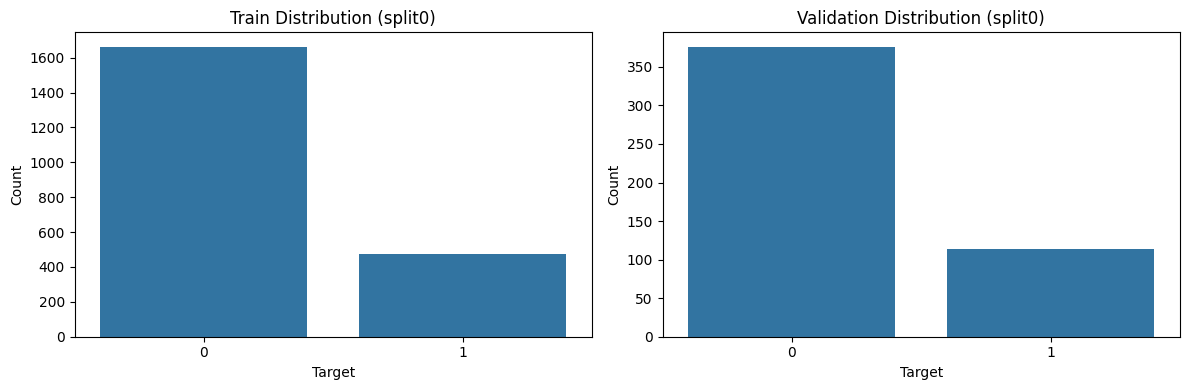

=== Distribution for split1 ===
Train target distribution:
target
0    0.780873
1    0.219127
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.751055
1    0.248945
Name: proportion, dtype: float64




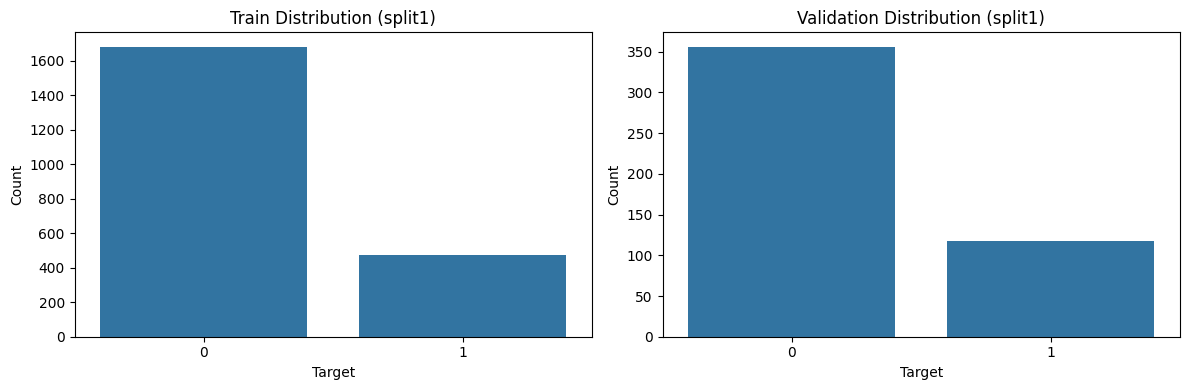

=== Distribution for split2 ===
Train target distribution:
target
0    0.774163
1    0.225837
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.780669
1    0.219331
Name: proportion, dtype: float64




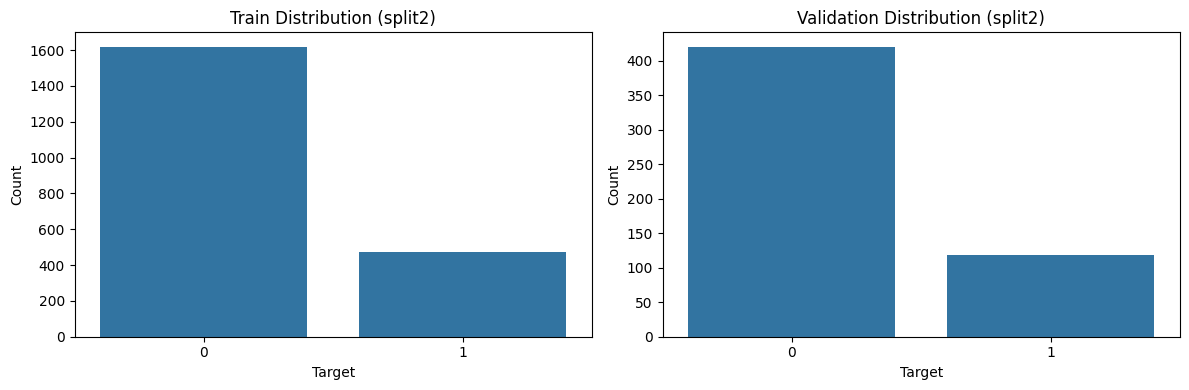

=== Distribution for split3 ===
Train target distribution:
target
0    0.772472
1    0.227528
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.788618
1    0.211382
Name: proportion, dtype: float64




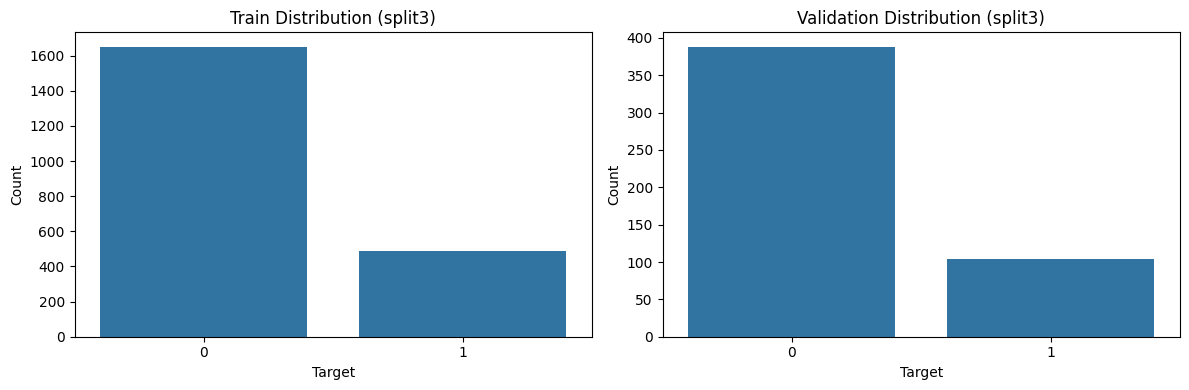

=== Distribution for split4 ===
Train target distribution:
target
0    0.773371
1    0.226629
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.784314
1    0.215686
Name: proportion, dtype: float64




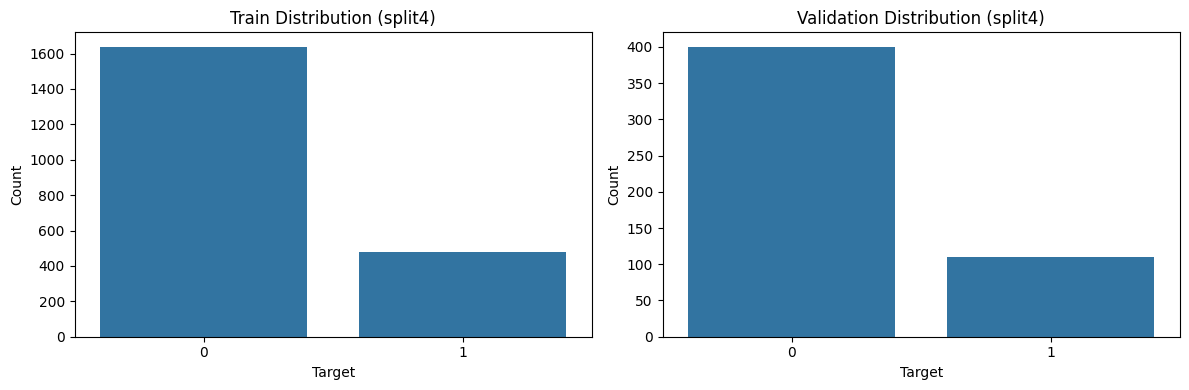

=== Distribution for split5 ===
Train target distribution:
target
0    0.779093
1    0.220907
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.763333
1    0.236667
Name: proportion, dtype: float64




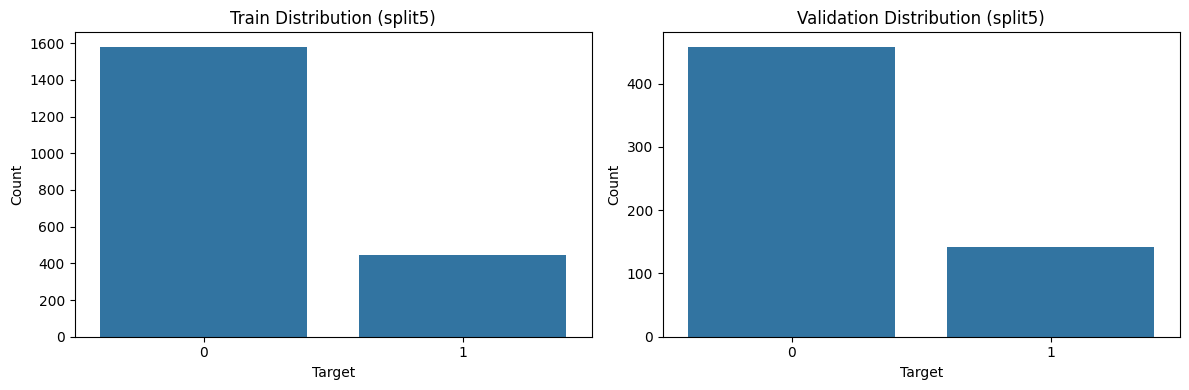

=== Distribution for split6 ===
Train target distribution:
target
0    0.776606
1    0.223394
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.771218
1    0.228782
Name: proportion, dtype: float64




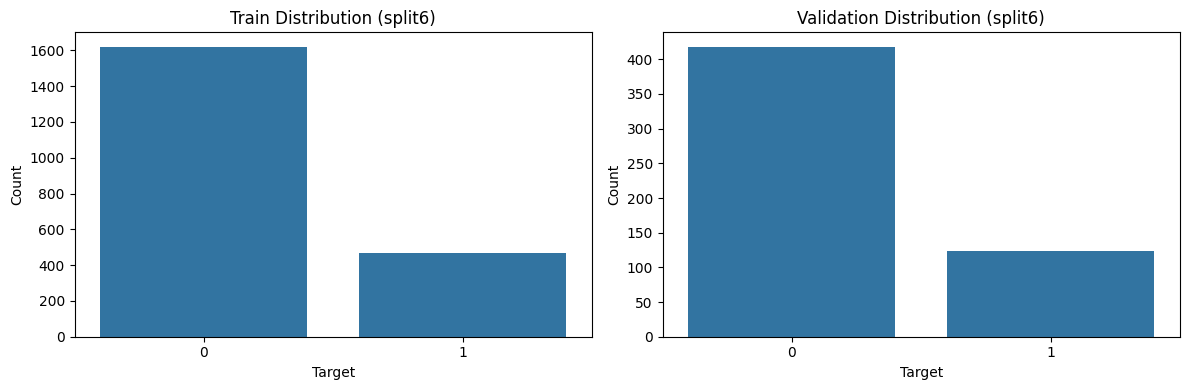

=== Distribution for split7 ===
Train target distribution:
target
0    0.785444
1    0.214556
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.734375
1    0.265625
Name: proportion, dtype: float64




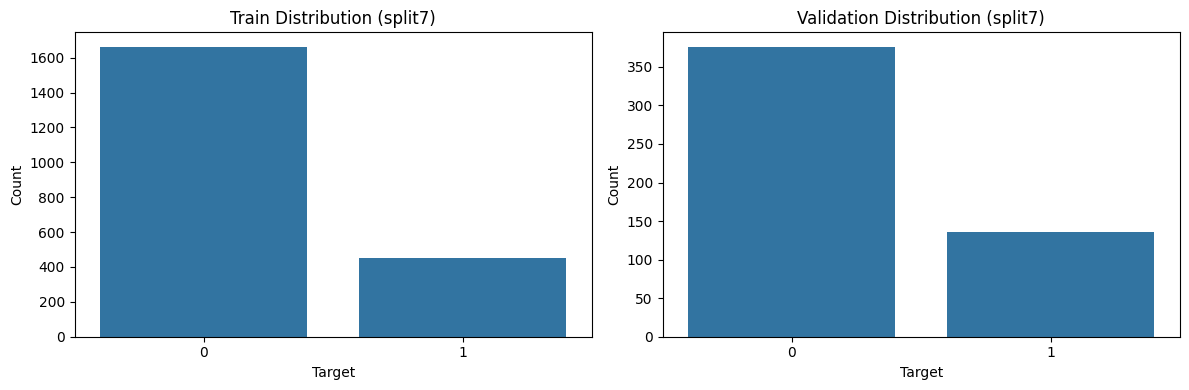

=== Distribution for split8 ===
Train target distribution:
target
0    0.784689
1    0.215311
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.739777
1    0.260223
Name: proportion, dtype: float64




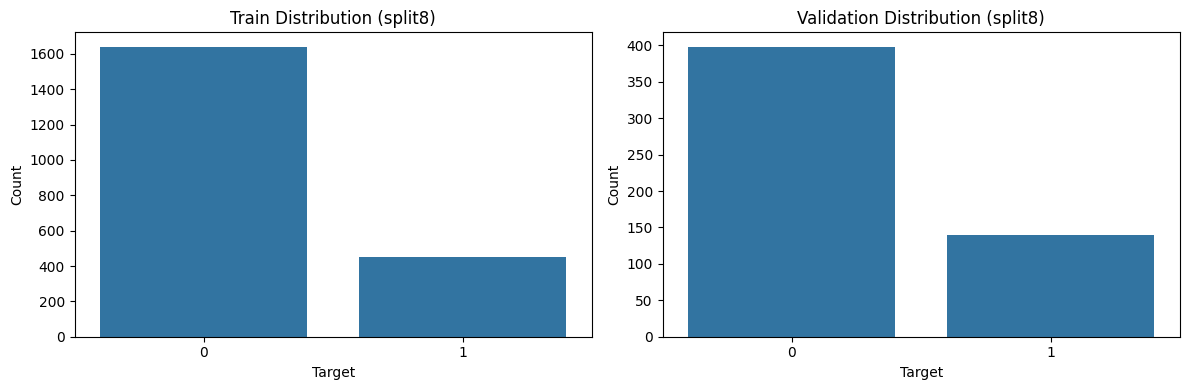

=== Distribution for split9 ===
Train target distribution:
target
0    0.7718
1    0.2282
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.792373
1    0.207627
Name: proportion, dtype: float64




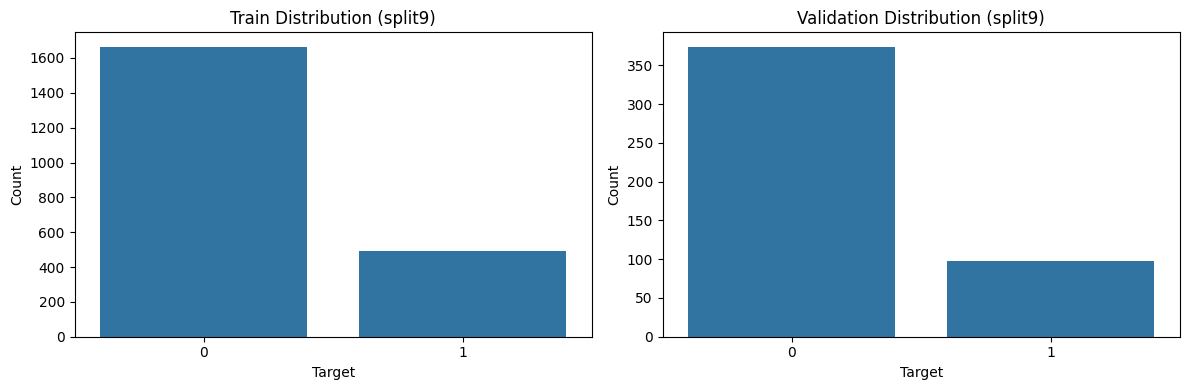

=== Distribution for split10 ===
Train target distribution:
target
0    0.77757
1    0.22243
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.766393
1    0.233607
Name: proportion, dtype: float64




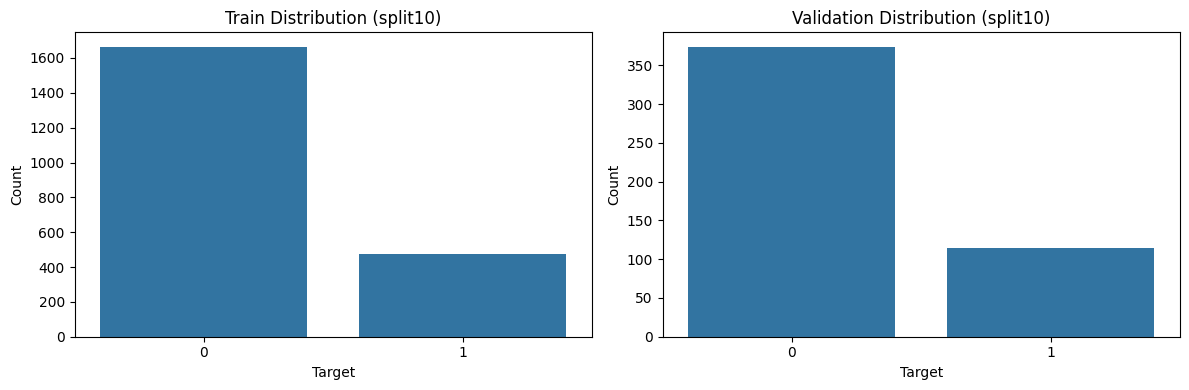

=== Distribution for split11 ===
Train target distribution:
target
0    0.771896
1    0.228104
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.789091
1    0.210909
Name: proportion, dtype: float64




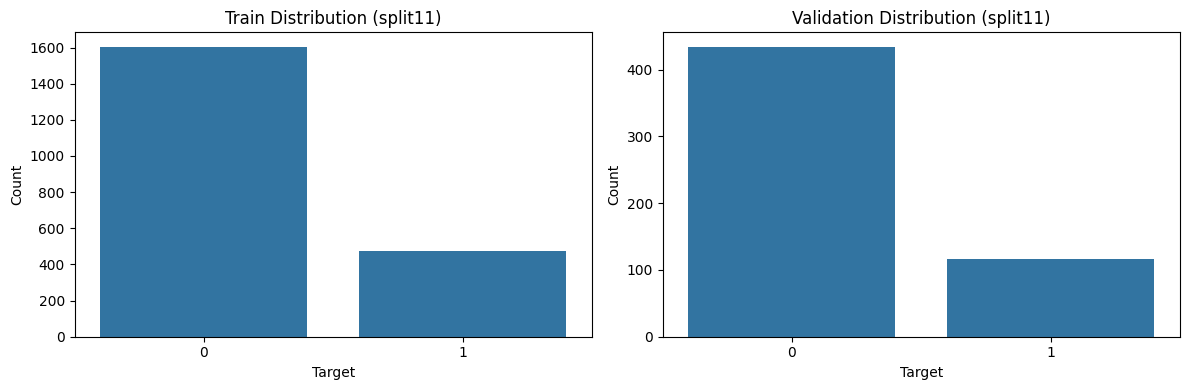

=== Distribution for split12 ===
Train target distribution:
target
0    0.771593
1    0.228407
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.790441
1    0.209559
Name: proportion, dtype: float64




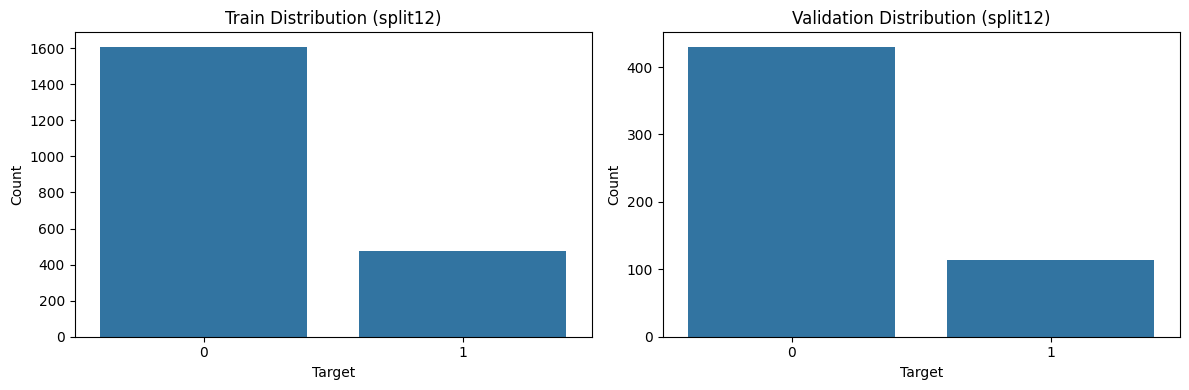

=== Distribution for split13 ===
Train target distribution:
target
0    0.774859
1    0.225141
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.778226
1    0.221774
Name: proportion, dtype: float64




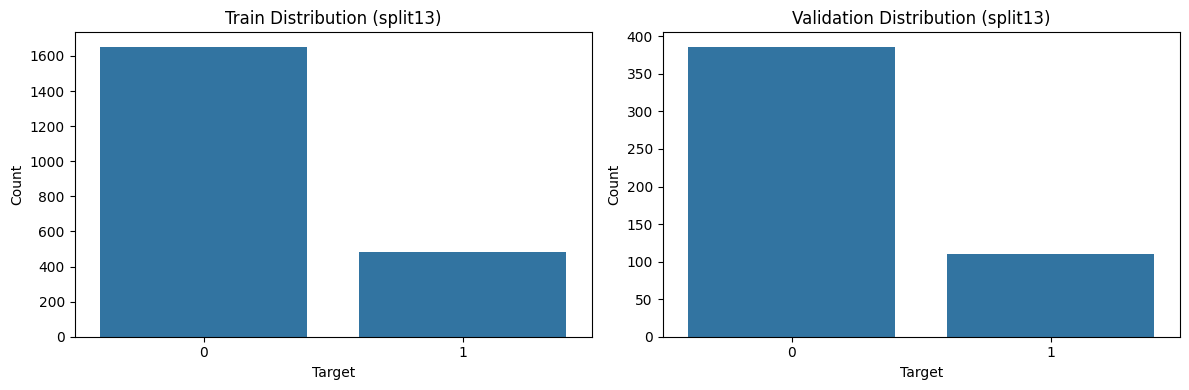

=== Distribution for split14 ===
Train target distribution:
target
0    0.786538
1    0.213462
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.733577
1    0.266423
Name: proportion, dtype: float64




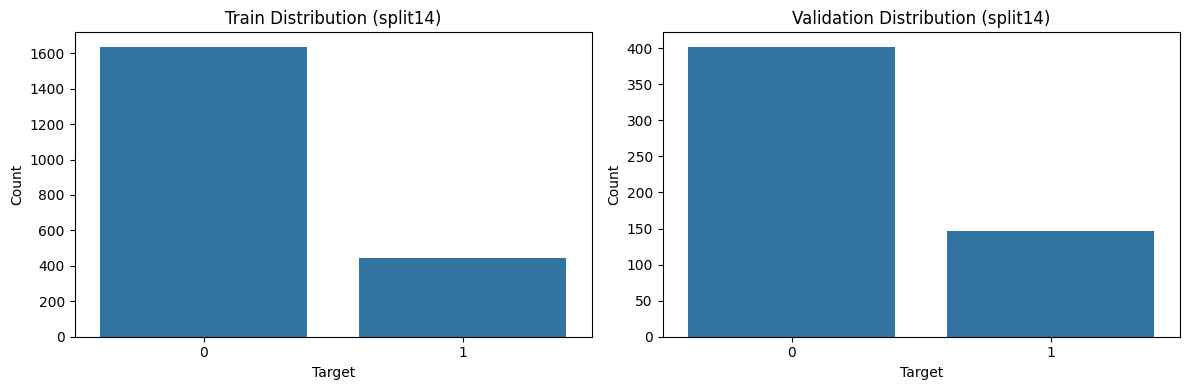

=== Distribution for split15 ===
Train target distribution:
target
0    0.770554
1    0.229446
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.794776
1    0.205224
Name: proportion, dtype: float64




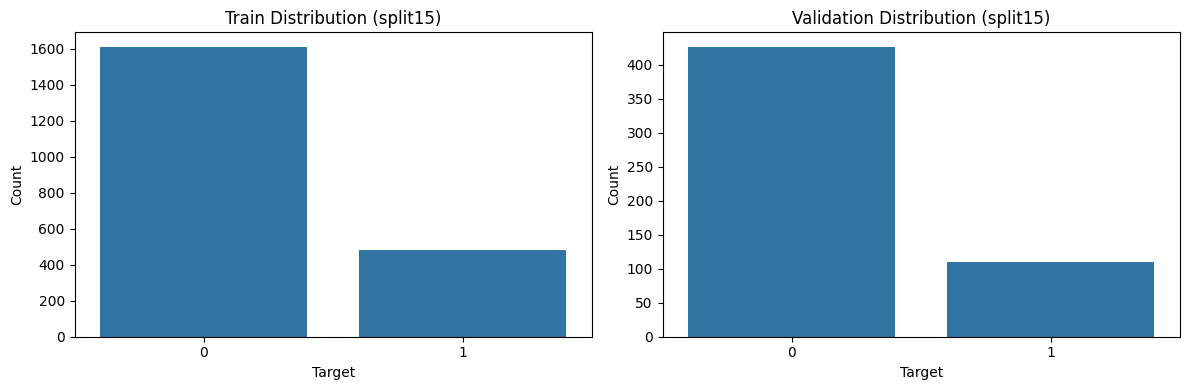

=== Distribution for split16 ===
Train target distribution:
target
0    0.778958
1    0.221042
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.76259
1    0.23741
Name: proportion, dtype: float64




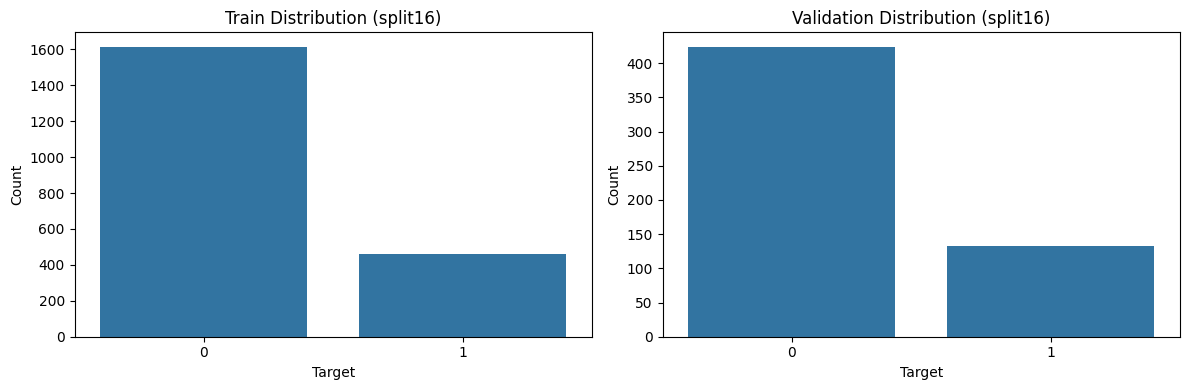

=== Distribution for split17 ===
Train target distribution:
target
0    0.789425
1    0.210575
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.711864
1    0.288136
Name: proportion, dtype: float64




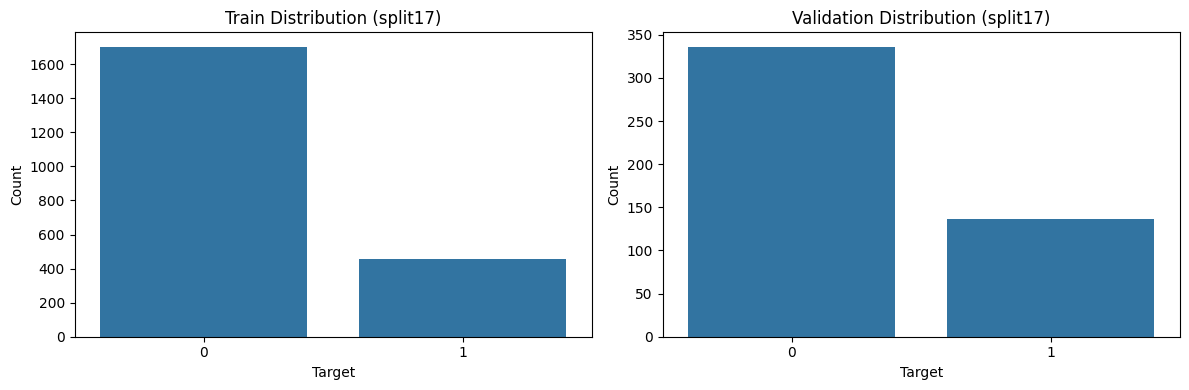

=== Distribution for split18 ===
Train target distribution:
target
0    0.780115
1    0.219885
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.757463
1    0.242537
Name: proportion, dtype: float64




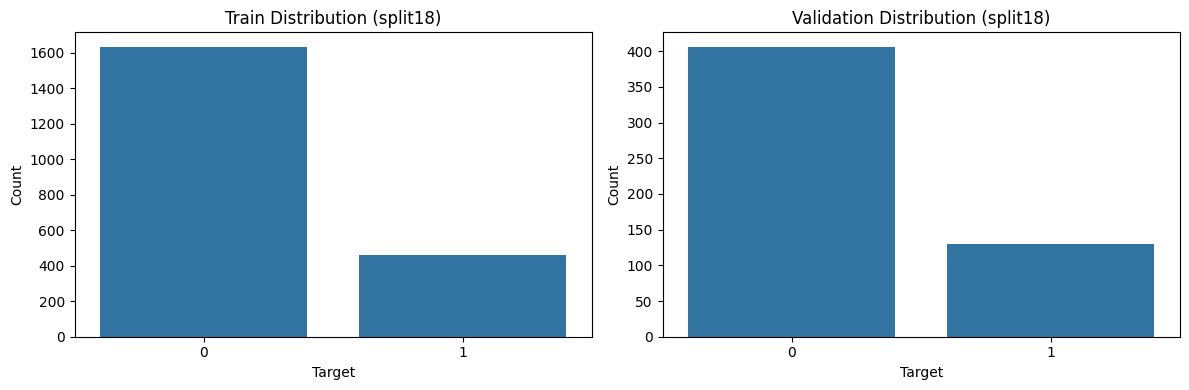

=== Distribution for split19 ===
Train target distribution:
target
0    0.775248
1    0.224752
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.776316
1    0.223684
Name: proportion, dtype: float64




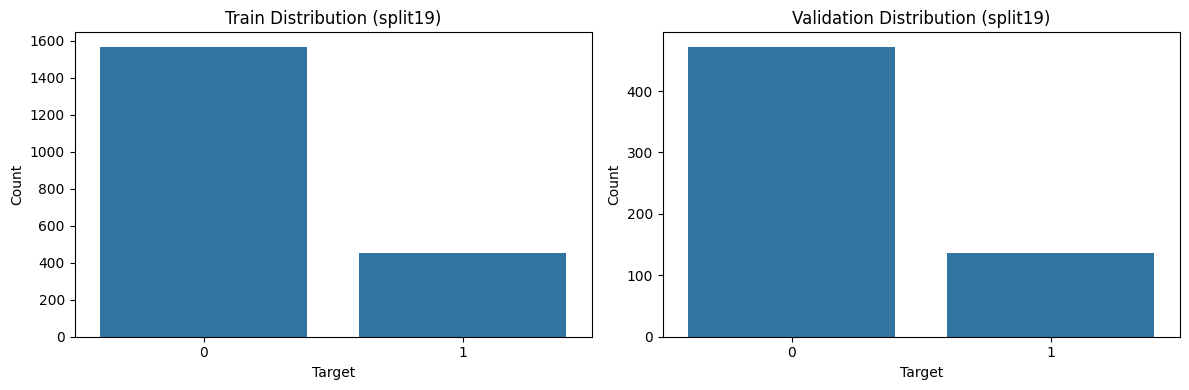

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = "/home/mezher/Documents/Deauville_DeepLearning/splitting/data_resplit.csv"
df_csv = pd.read_csv(csv_path)

# Define the list of bootstrap split columns
split_columns = [f"split{i}" for i in range(20)]

# Loop over each bootstrap split and compare target distributions for train vs. val
for split_col in split_columns:
    print(f"=== Distribution for {split_col} ===")
    
    # Filter DataFrame for train and validation groups based on current split
    train_df = df_csv[df_csv[split_col] == 'train']
    val_df = df_csv[df_csv[split_col] == 'val']
    
    # Calculate and print normalized target distributions
    print("Train target distribution:")
    print(train_df["target"].value_counts(normalize=True))
    print("\nValidation target distribution:")
    print(val_df["target"].value_counts(normalize=True))
    print("\n" + "="*50 + "\n")
    
    # Create side-by-side countplots for a visual comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.countplot(ax=axes[0], x="target", data=train_df)
    axes[0].set_title(f"Train Distribution ({split_col})")
    axes[0].set_xlabel("Target")
    axes[0].set_ylabel("Count")
    
    sns.countplot(ax=axes[1], x="target", data=val_df)
    axes[1].set_title(f"Validation Distribution ({split_col})")
    axes[1].set_xlabel("Target")
    axes[1].set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()


=== Covariate distributions for split0 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.628337
F    0.371663
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.513208
F    0.486792
Name: proportion, dtype: float64


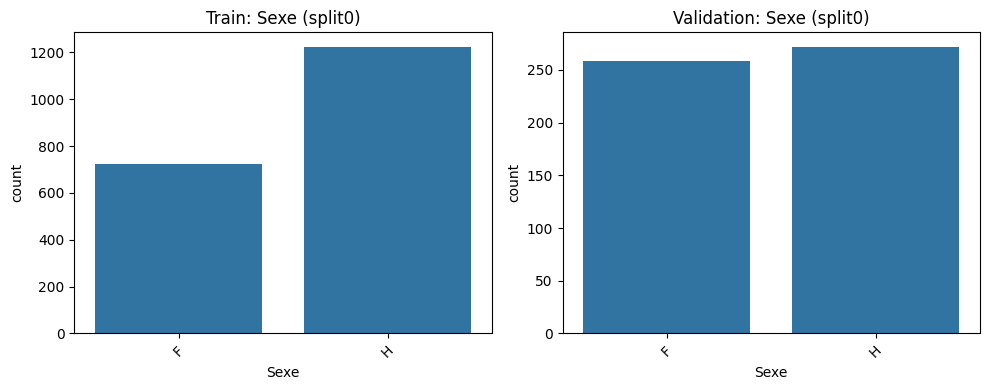


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.606776
3    0.197125
2    0.196099
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.618868
3    0.226415
2    0.154717
Name: proportion, dtype: float64


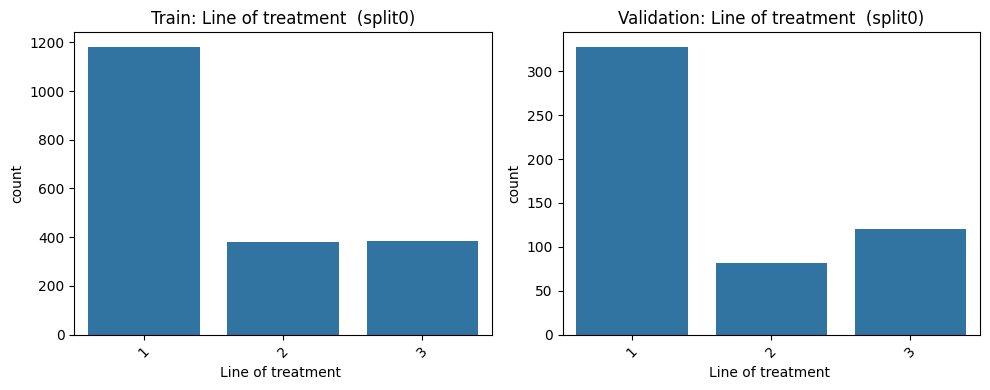


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.723819
10    0.276181
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.641509
10    0.358491
Name: proportion, dtype: float64


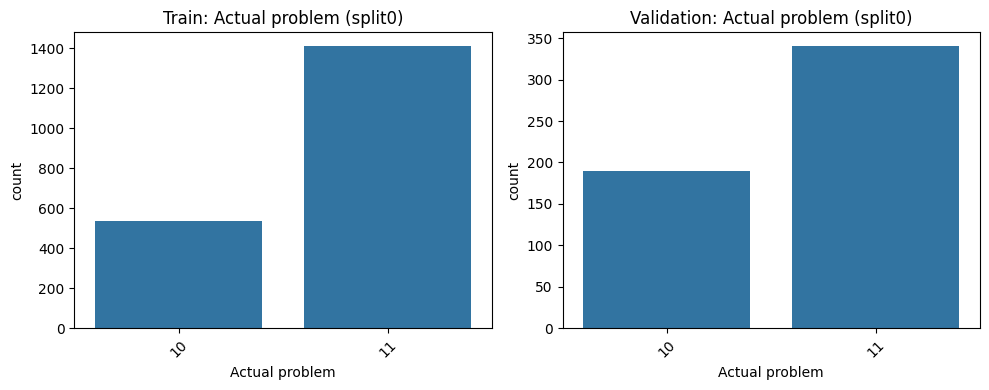



=== Covariate distributions for split1 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.607746
F    0.392254
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.586207
F    0.413793
Name: proportion, dtype: float64


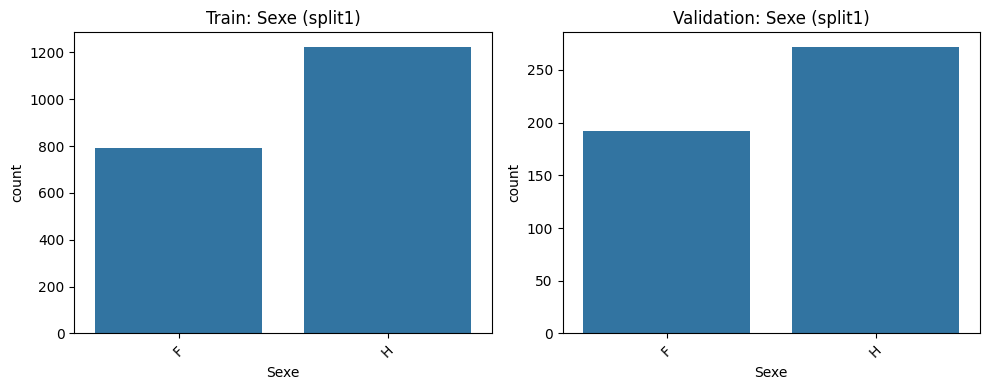


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.613704
3    0.202582
2    0.183714
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.590517
3    0.206897
2    0.202586
Name: proportion, dtype: float64


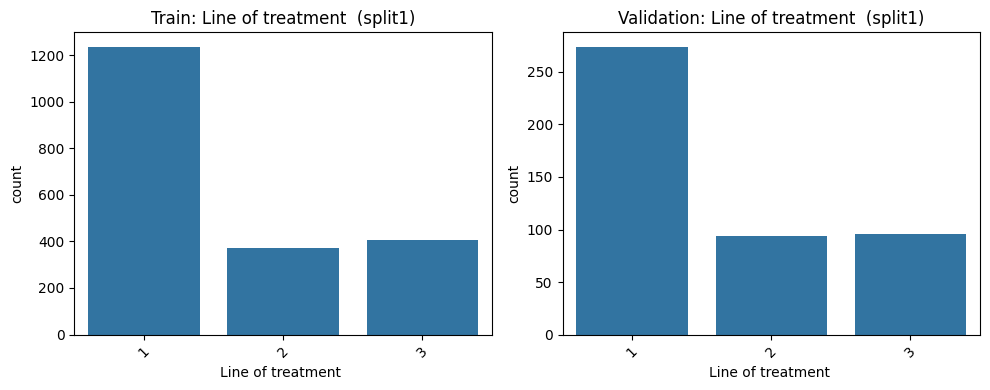


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.712016
10    0.287984
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.681034
10    0.318966
Name: proportion, dtype: float64


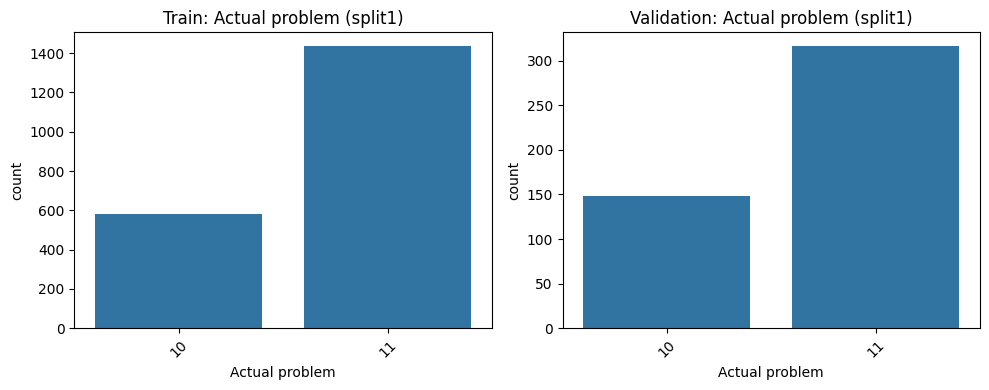



=== Covariate distributions for split2 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.625255
F    0.374745
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.521401
F    0.478599
Name: proportion, dtype: float64


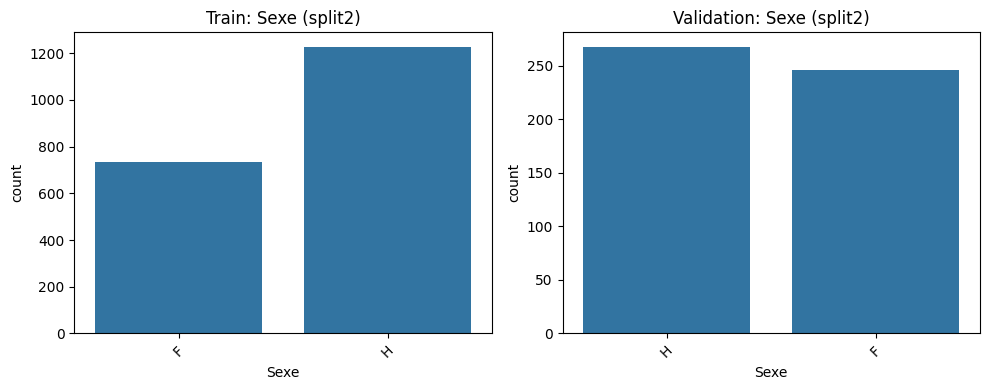


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.637475
3    0.189409
2    0.173116
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.501946
3    0.256809
2    0.241245
Name: proportion, dtype: float64


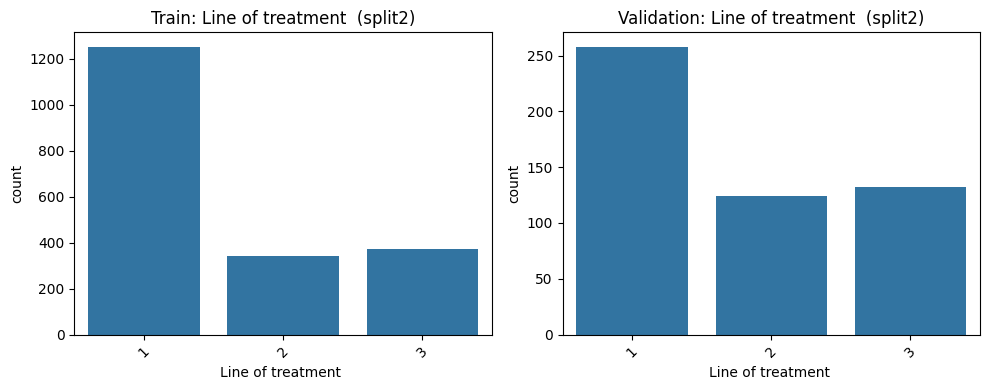


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.720978
10    0.279022
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.649805
10    0.350195
Name: proportion, dtype: float64


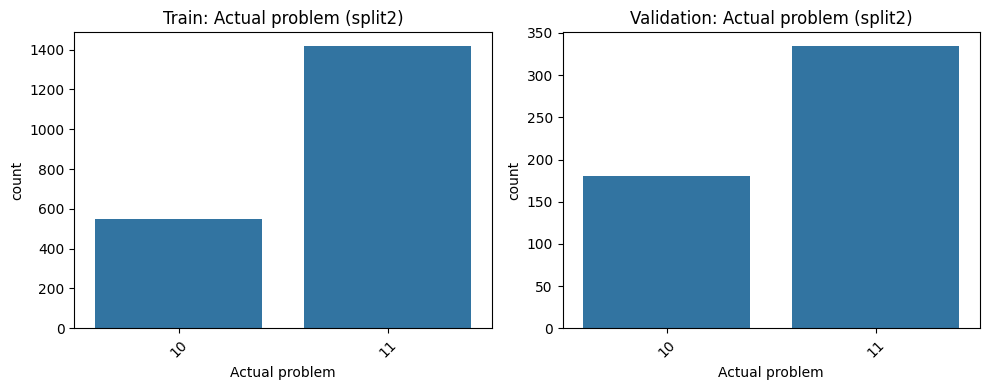



=== Covariate distributions for split3 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.599395
F    0.400605
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.620968
F    0.379032
Name: proportion, dtype: float64


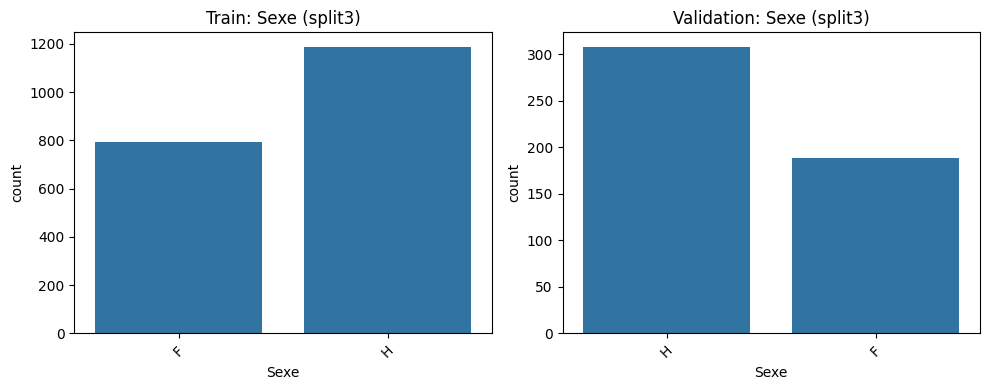


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.616549
3    0.204844
2    0.178607
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.580645
2    0.221774
3    0.197581
Name: proportion, dtype: float64


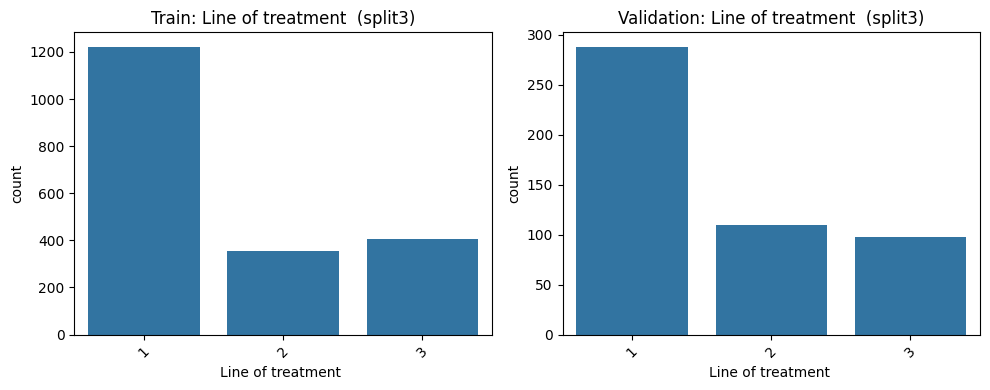


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.710394
10    0.289606
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.689516
10    0.310484
Name: proportion, dtype: float64


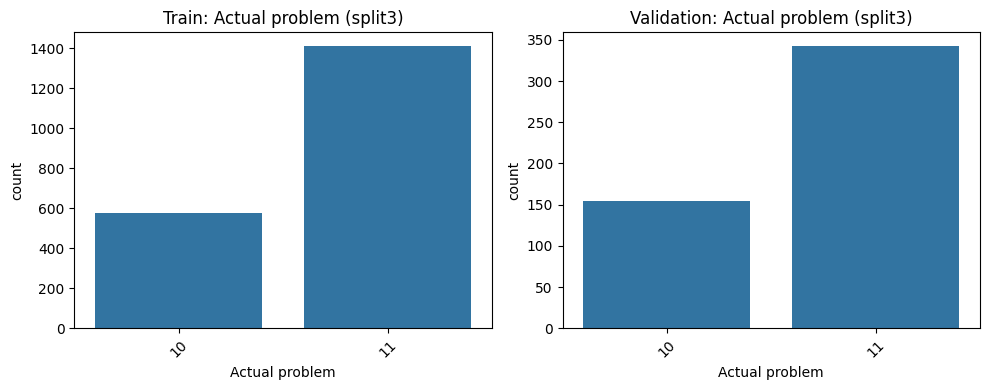



=== Covariate distributions for split4 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.61807
F    0.38193
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.550943
F    0.449057
Name: proportion, dtype: float64


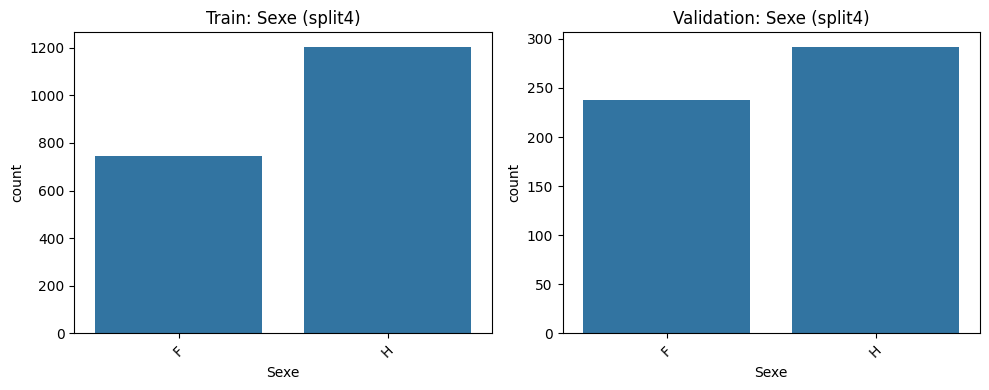


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.610883
3    0.204312
2    0.184805
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.603774
3    0.200000
2    0.196226
Name: proportion, dtype: float64


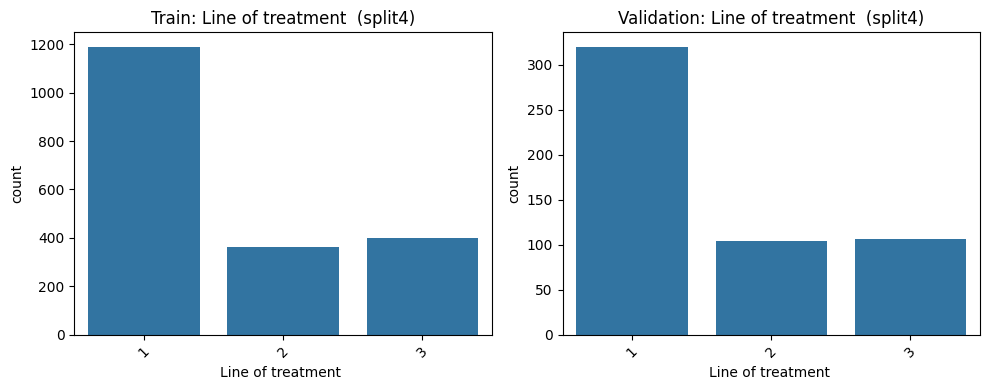


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.709446
10    0.290554
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.69434
10    0.30566
Name: proportion, dtype: float64


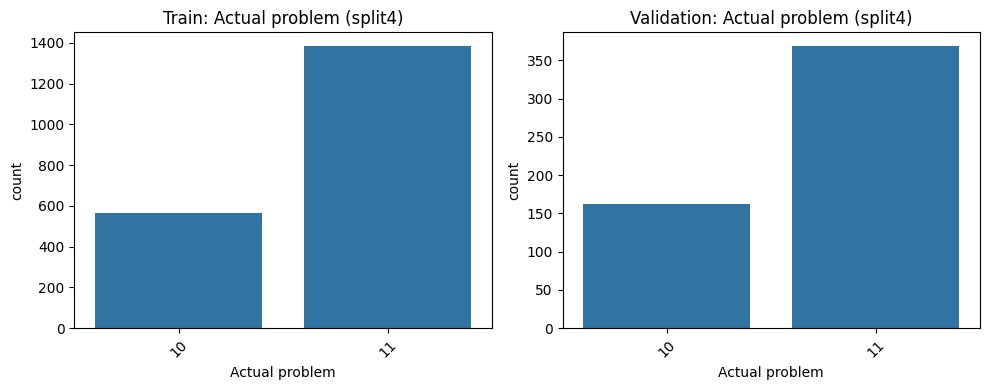



=== Covariate distributions for split5 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.604251
F    0.395749
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.601594
F    0.398406
Name: proportion, dtype: float64


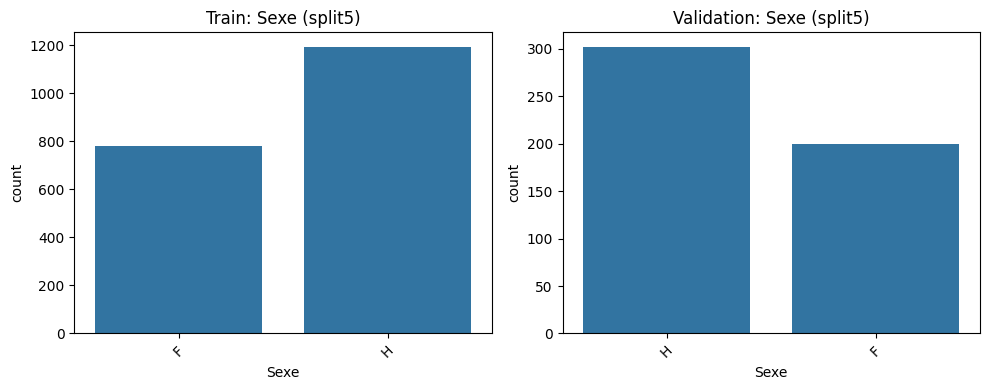


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.613360
2    0.194332
3    0.192308
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.593625
3    0.247012
2    0.159363
Name: proportion, dtype: float64


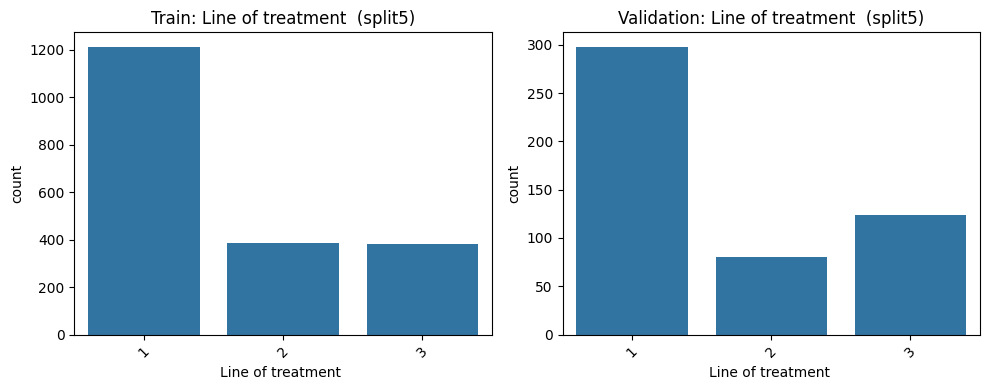


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.70749
10    0.29251
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.701195
10    0.298805
Name: proportion, dtype: float64


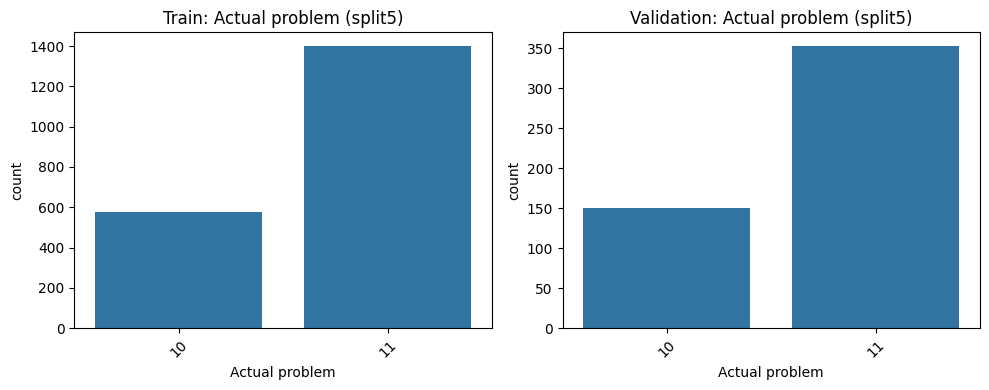



=== Covariate distributions for split6 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.603811
F    0.396189
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.603306
F    0.396694
Name: proportion, dtype: float64


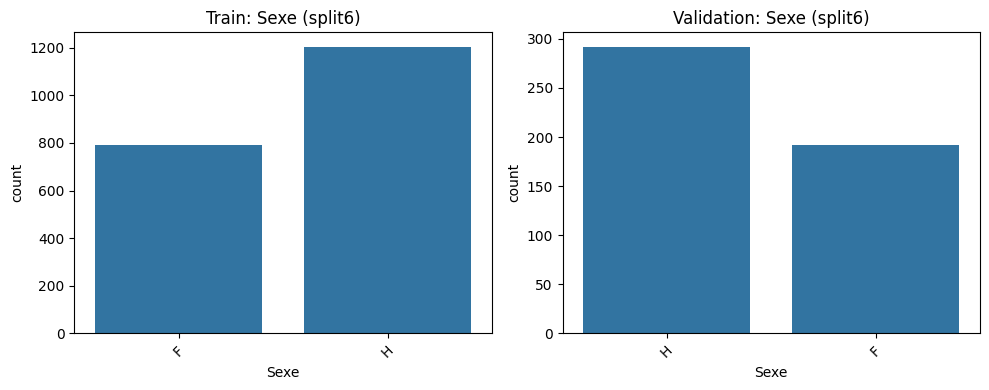


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.613842
3    0.204614
2    0.181545
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.590909
2    0.210744
3    0.198347
Name: proportion, dtype: float64


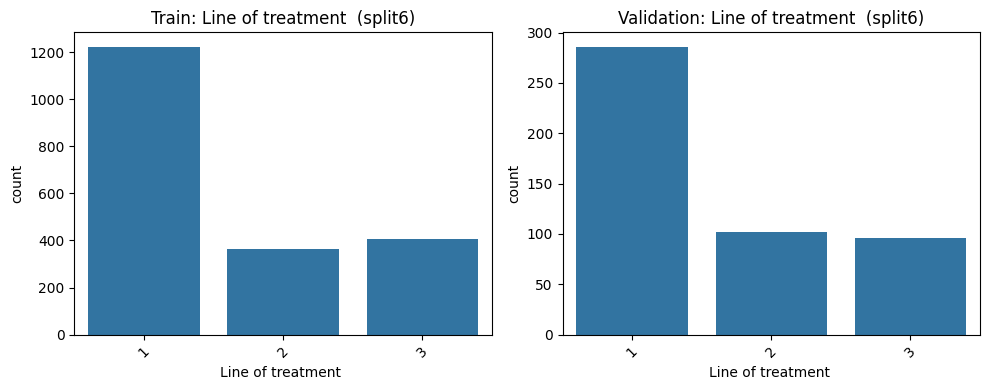


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.71013
10    0.28987
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.690083
10    0.309917
Name: proportion, dtype: float64


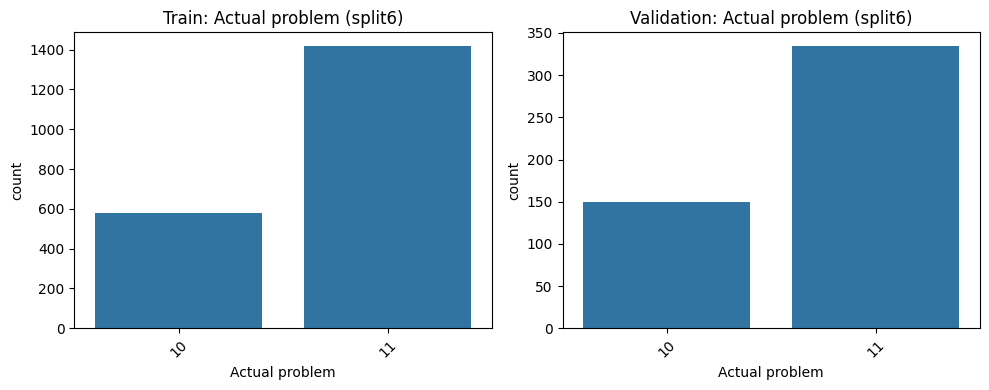



=== Covariate distributions for split7 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.584247
F    0.415753
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.686441
F    0.313559
Name: proportion, dtype: float64


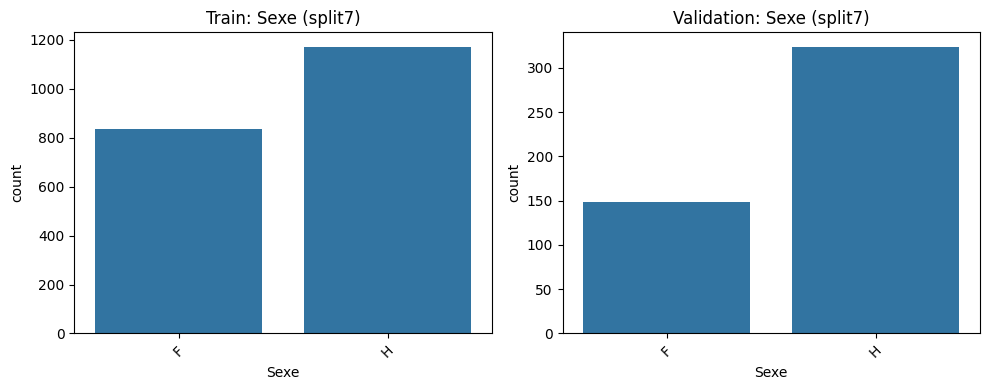


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.614158
3    0.194417
2    0.191426
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.588983
3    0.241525
2    0.169492
Name: proportion, dtype: float64


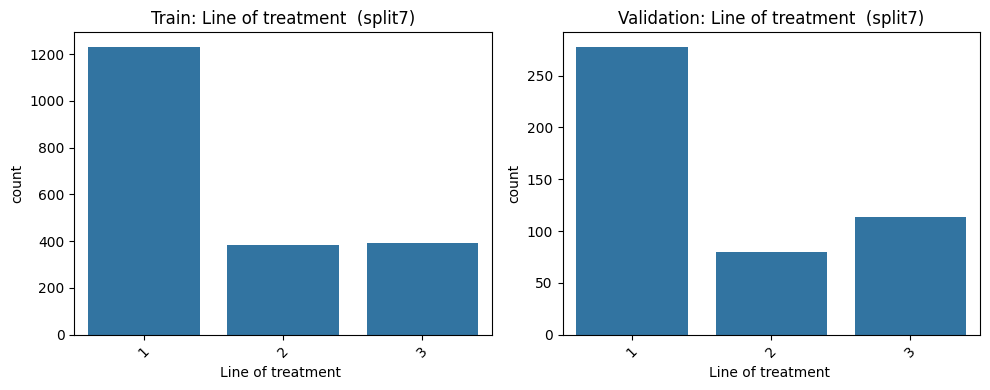


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.70987
10    0.29013
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.690678
10    0.309322
Name: proportion, dtype: float64


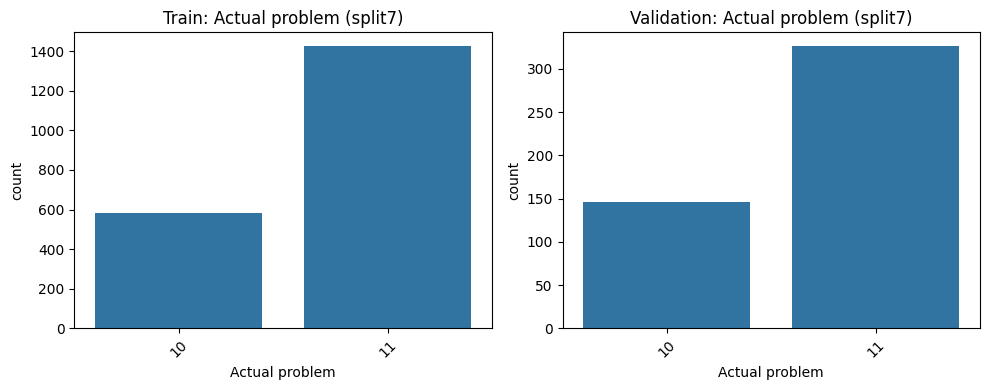



=== Covariate distributions for split8 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.590679
F    0.409321
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.654762
F    0.345238
Name: proportion, dtype: float64


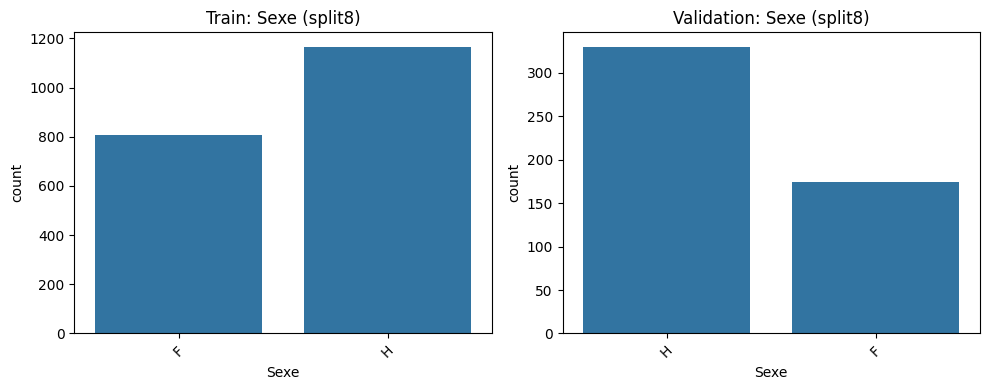


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.612969
2    0.195542
3    0.191489
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.595238
3    0.250000
2    0.154762
Name: proportion, dtype: float64


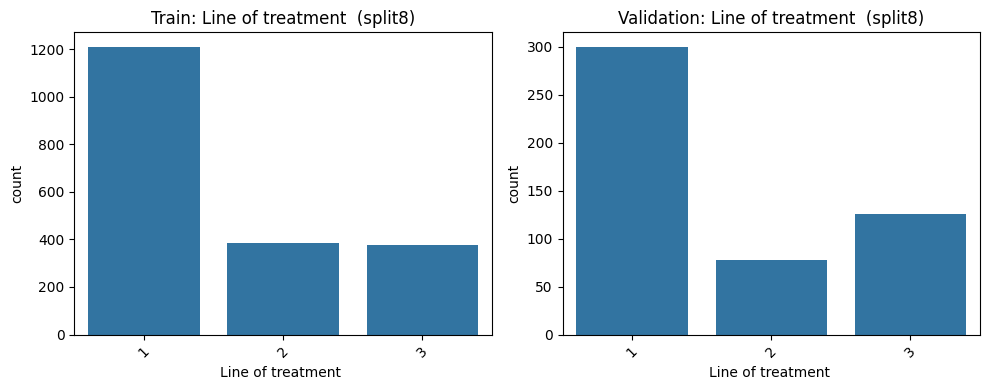


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.708207
10    0.291793
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.698413
10    0.301587
Name: proportion, dtype: float64


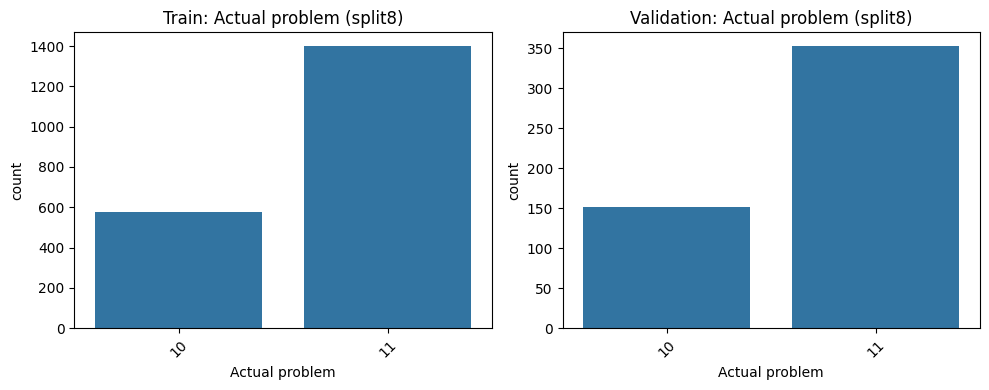



=== Covariate distributions for split9 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.604418
F    0.395582
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.600823
F    0.399177
Name: proportion, dtype: float64


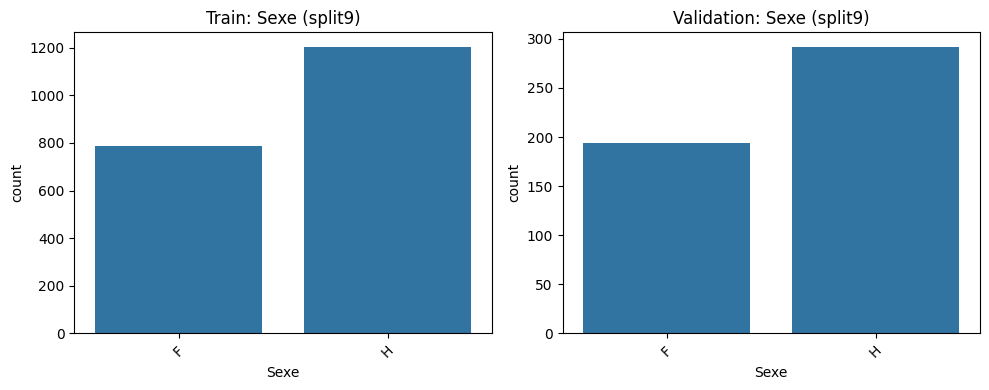


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.610442
3    0.199799
2    0.189759
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.604938
3    0.218107
2    0.176955
Name: proportion, dtype: float64


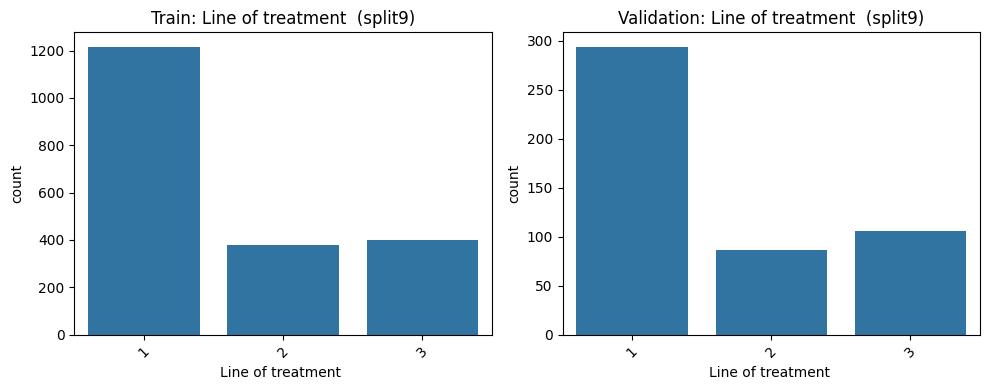


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.704819
10    0.295181
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.711934
10    0.288066
Name: proportion, dtype: float64


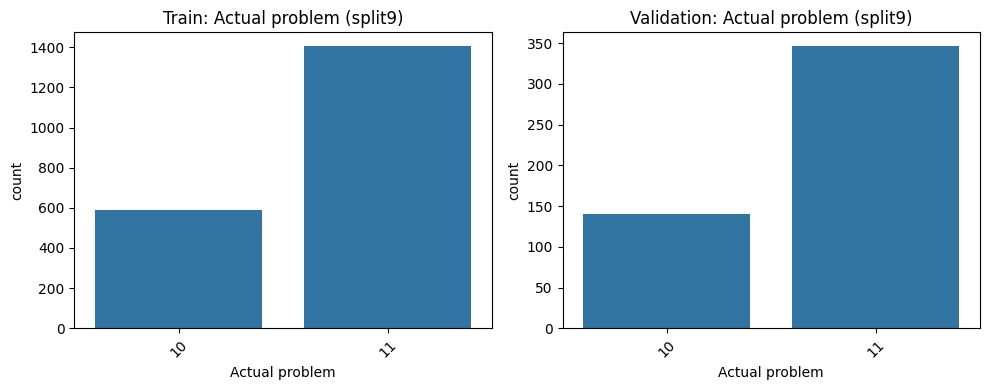



=== Covariate distributions for split10 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.603046
F    0.396954
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.606299
F    0.393701
Name: proportion, dtype: float64


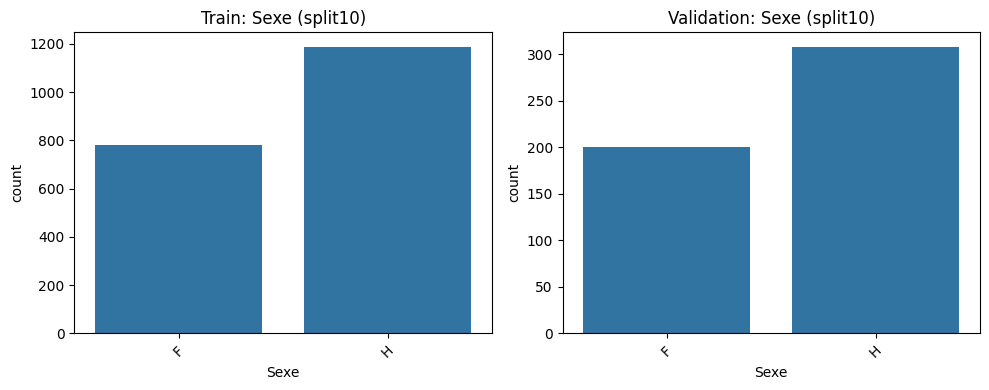


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.621320
3    0.193909
2    0.184772
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.562992
3    0.240157
2    0.196850
Name: proportion, dtype: float64


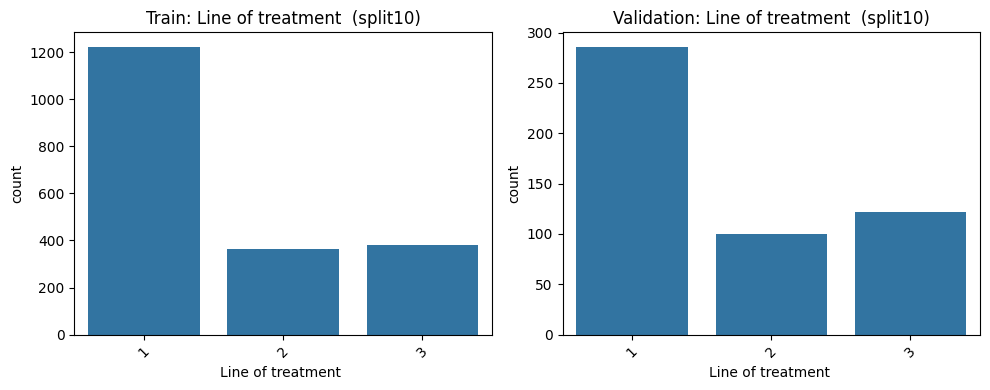


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.707614
10    0.292386
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.700787
10    0.299213
Name: proportion, dtype: float64


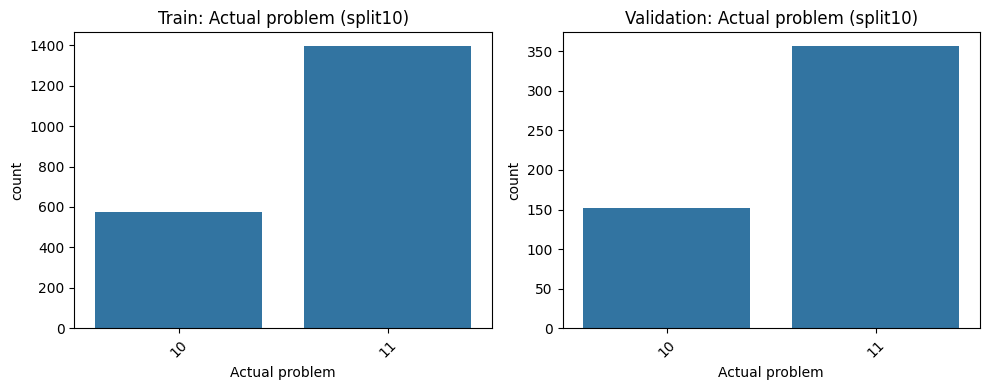



=== Covariate distributions for split11 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.629592
F    0.370408
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.505792
F    0.494208
Name: proportion, dtype: float64


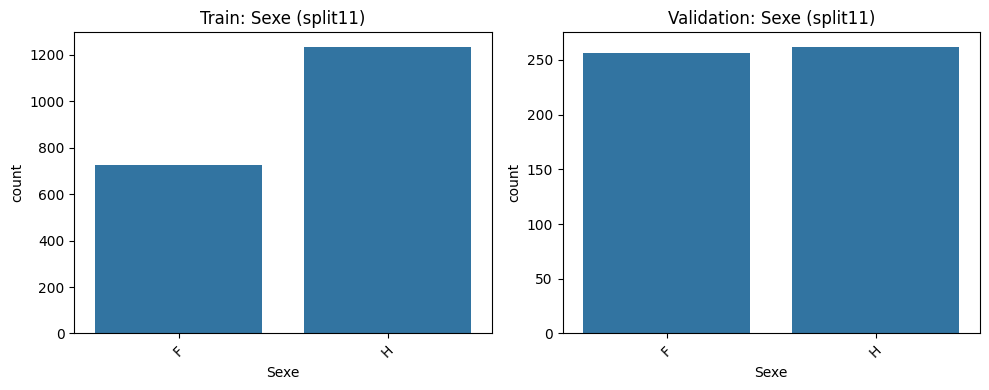


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.608163
3    0.208163
2    0.183673
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.613900
2    0.200772
3    0.185328
Name: proportion, dtype: float64


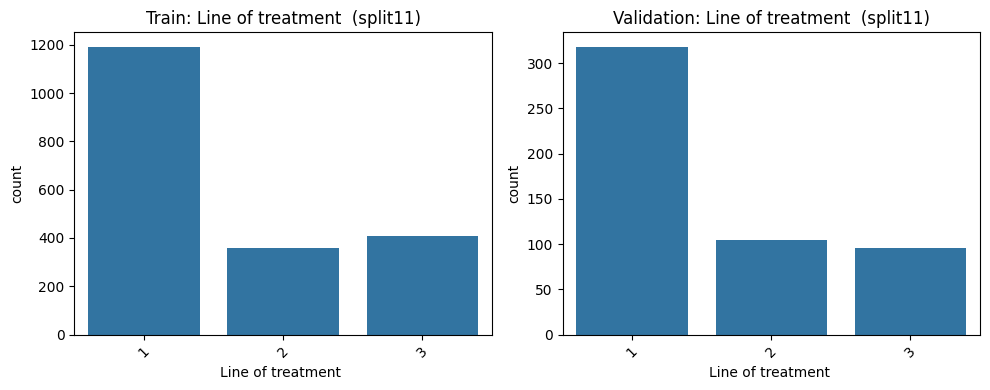


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.70102
10    0.29898
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.725869
10    0.274131
Name: proportion, dtype: float64


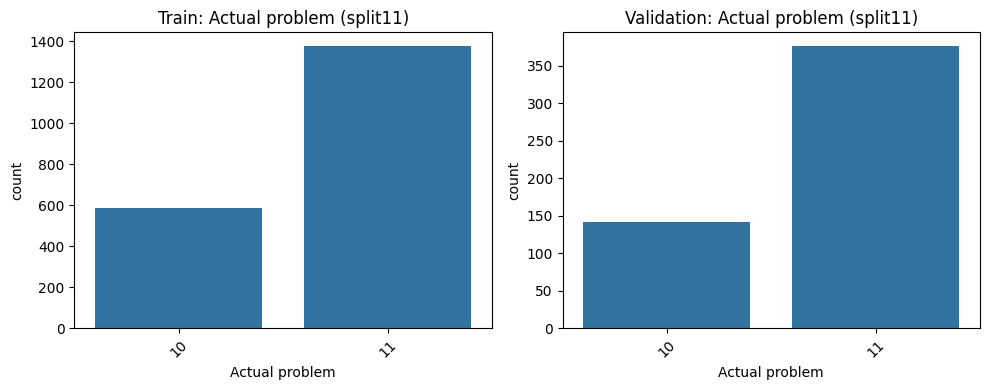



=== Covariate distributions for split12 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.591816
F    0.408184
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.654008
F    0.345992
Name: proportion, dtype: float64


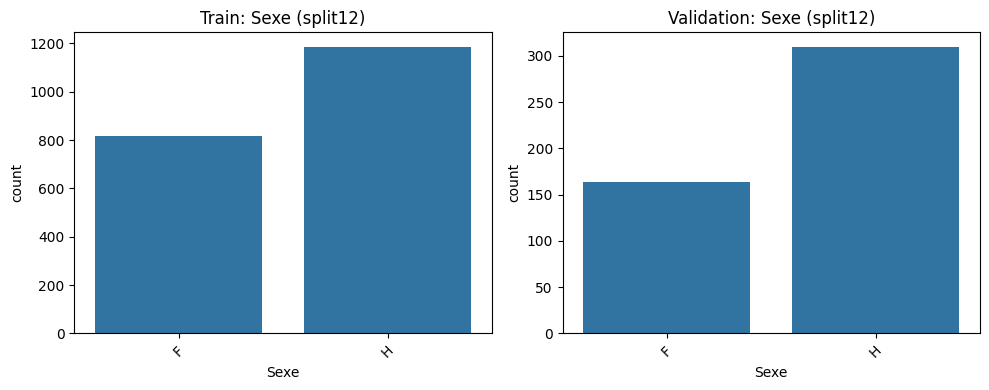


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.604790
3    0.203593
2    0.191617
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.628692
3    0.202532
2    0.168776
Name: proportion, dtype: float64


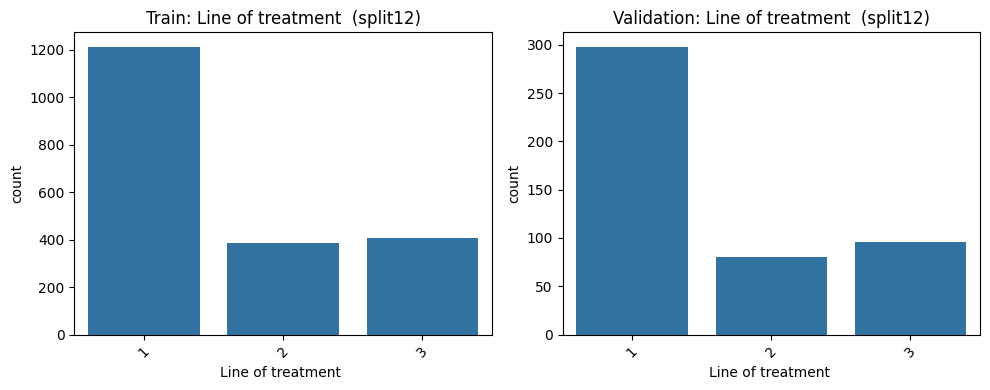


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.708583
10    0.291417
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.696203
10    0.303797
Name: proportion, dtype: float64


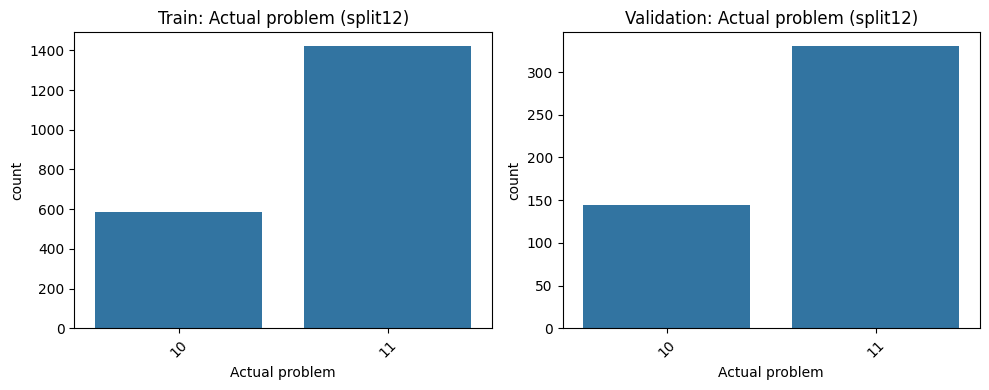



=== Covariate distributions for split13 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.608025
F    0.391975
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.588015
F    0.411985
Name: proportion, dtype: float64


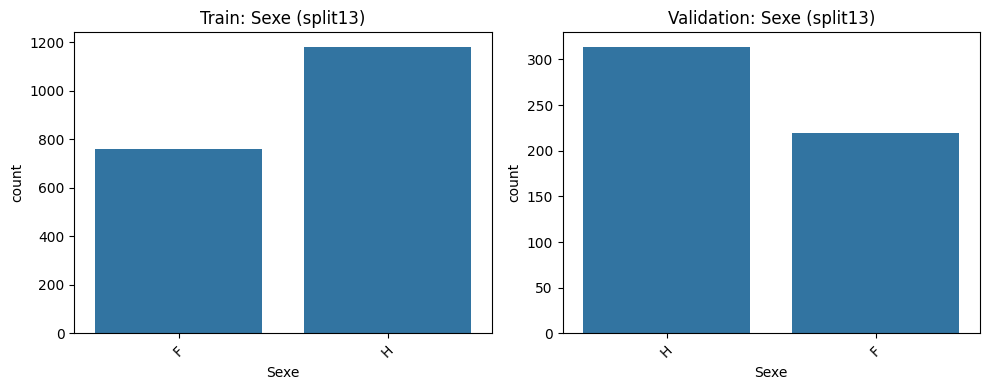


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.616255
3    0.193416
2    0.190329
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.58427
3    0.23970
2    0.17603
Name: proportion, dtype: float64


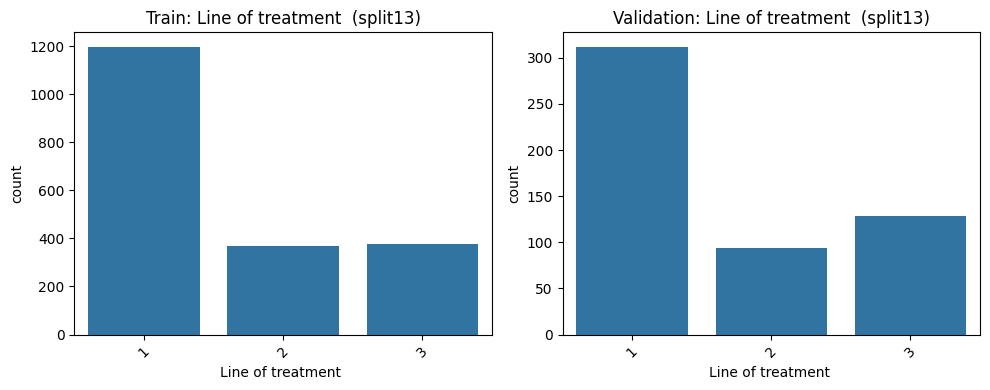


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.70679
10    0.29321
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.70412
10    0.29588
Name: proportion, dtype: float64


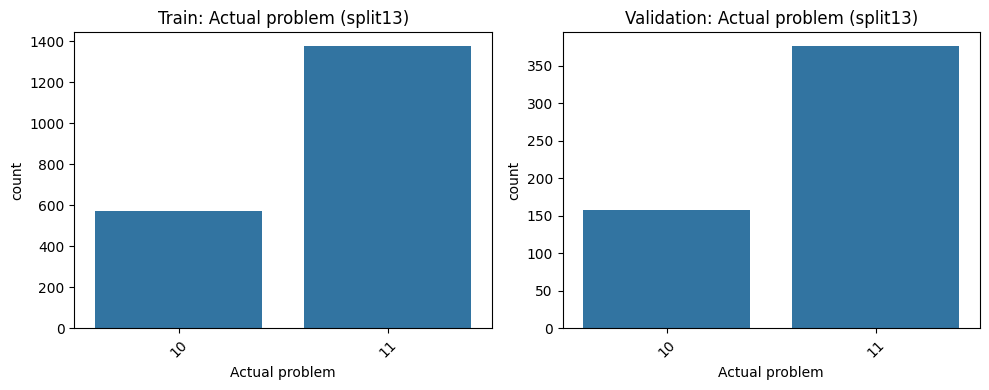



=== Covariate distributions for split14 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.603533
F    0.396467
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.604545
F    0.395455
Name: proportion, dtype: float64


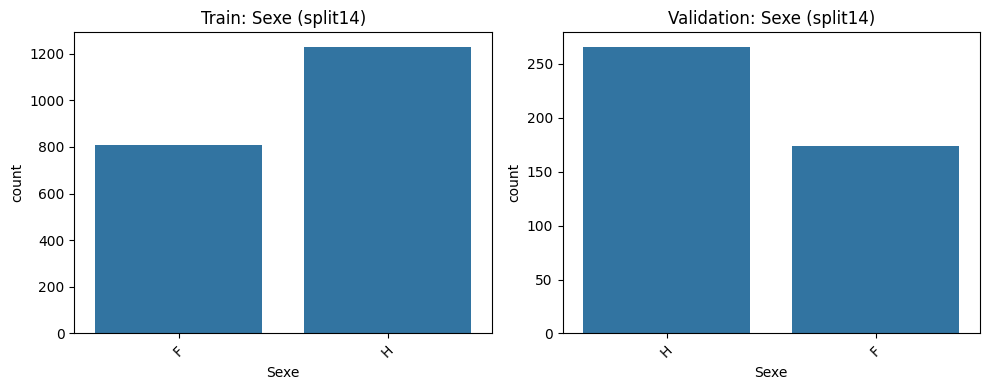


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.627085
3    0.190383
2    0.182532
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.527273
3    0.263636
2    0.209091
Name: proportion, dtype: float64


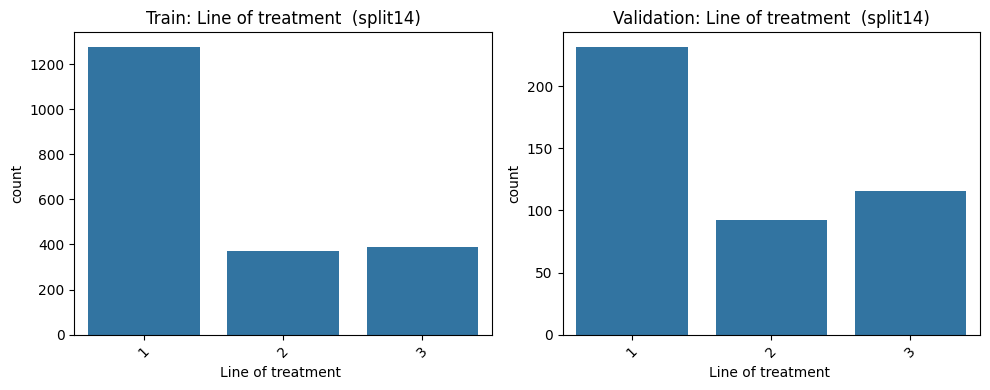


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.714426
10    0.285574
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.668182
10    0.331818
Name: proportion, dtype: float64


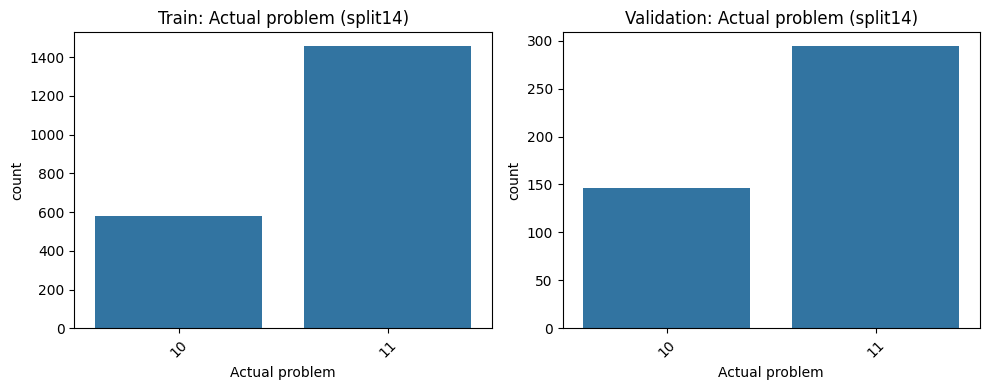



=== Covariate distributions for split15 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.596154
F    0.403846
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.633466
F    0.366534
Name: proportion, dtype: float64


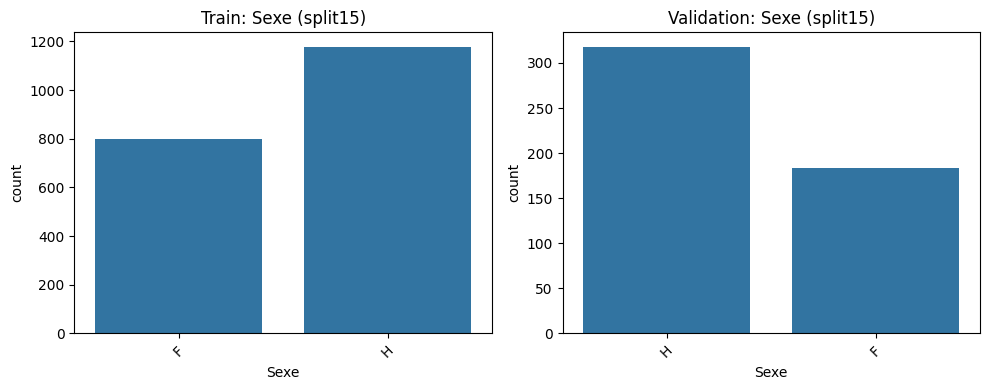


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.631579
3    0.195344
2    0.173077
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.521912
2    0.243028
3    0.235060
Name: proportion, dtype: float64


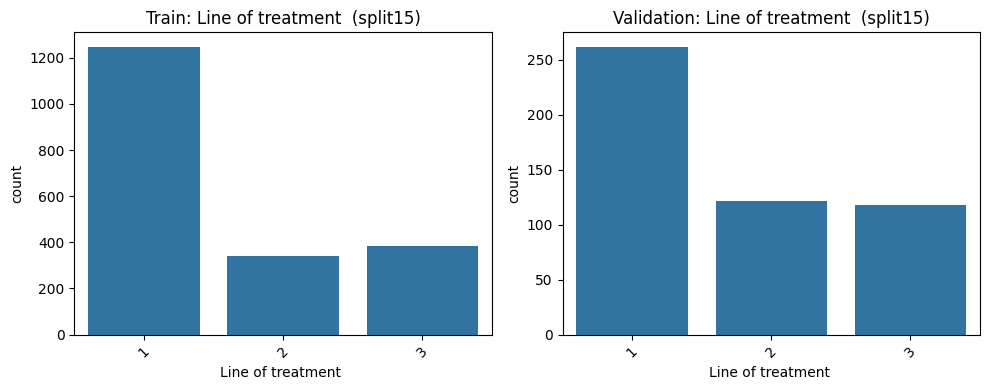


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.709514
10    0.290486
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.693227
10    0.306773
Name: proportion, dtype: float64


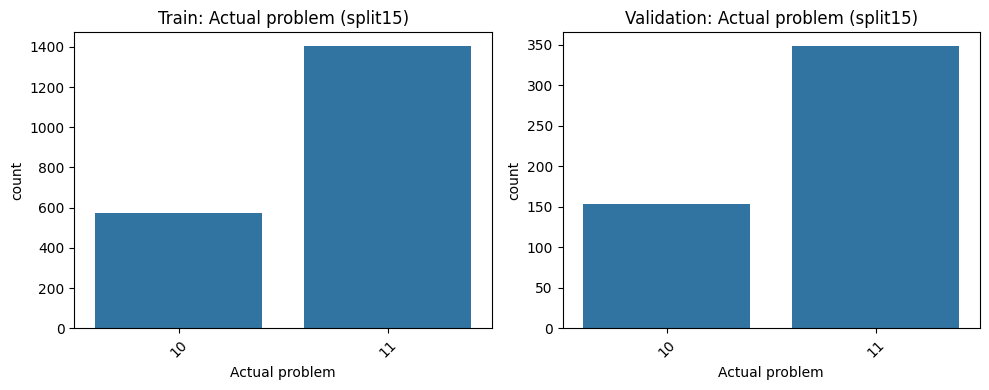



=== Covariate distributions for split16 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.609544
F    0.390456
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.586751
F    0.413249
Name: proportion, dtype: float64


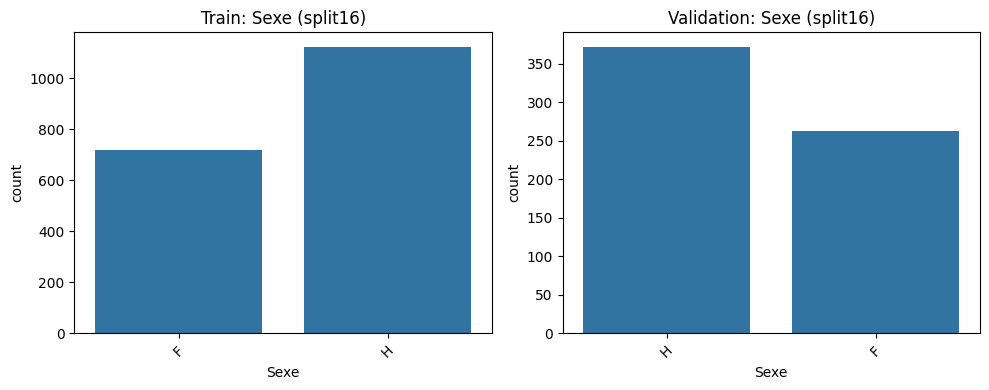


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.616052
3    0.191974
2    0.191974
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.589905
3    0.236593
2    0.173502
Name: proportion, dtype: float64


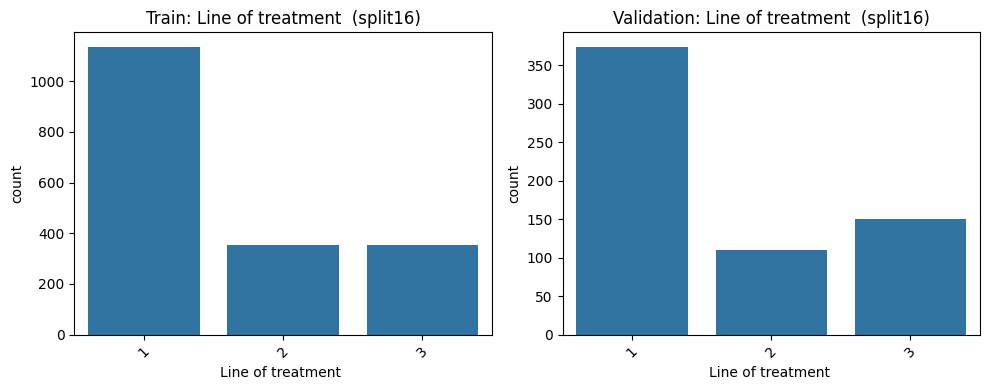


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.715835
10    0.284165
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.678233
10    0.321767
Name: proportion, dtype: float64


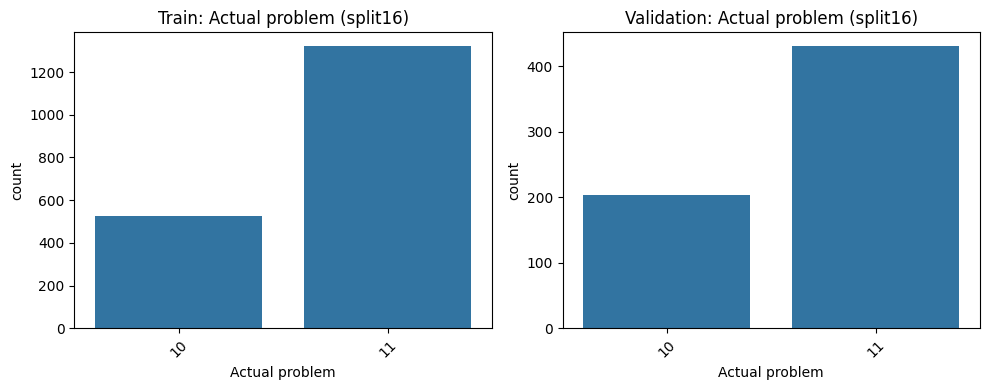



=== Covariate distributions for split17 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.595808
F    0.404192
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.637131
F    0.362869
Name: proportion, dtype: float64


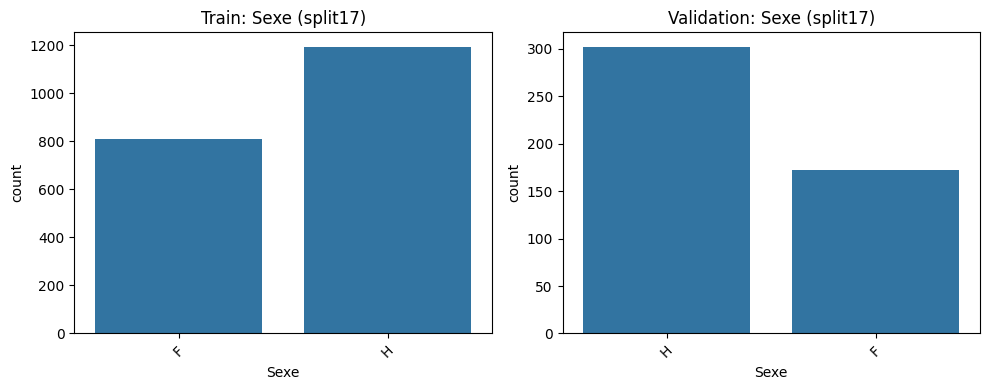


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.611776
3    0.198603
2    0.189621
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.599156
3    0.223629
2    0.177215
Name: proportion, dtype: float64


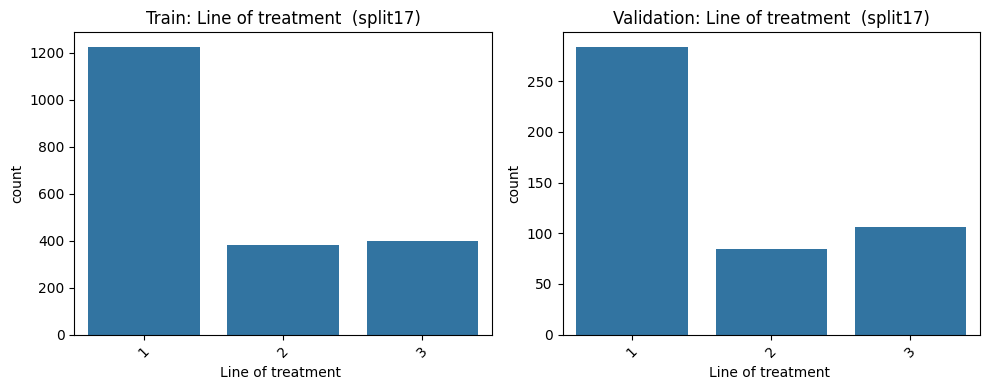


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.716567
10    0.283433
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.662447
10    0.337553
Name: proportion, dtype: float64


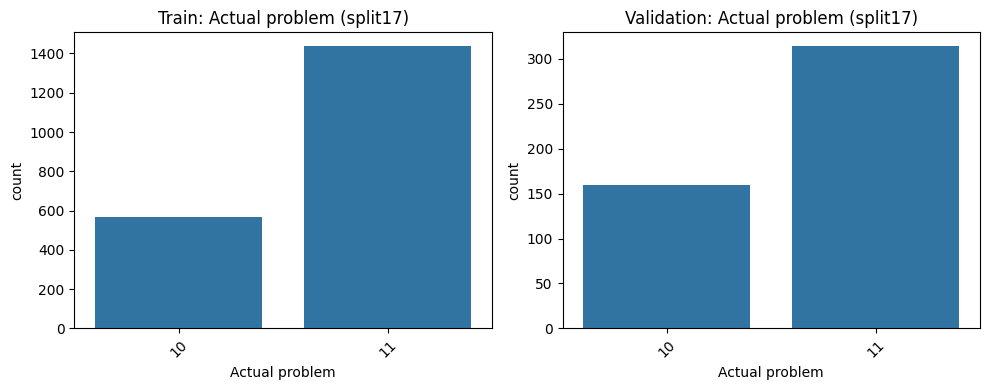



=== Covariate distributions for split18 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.617734
F    0.382266
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.540179
F    0.459821
Name: proportion, dtype: float64


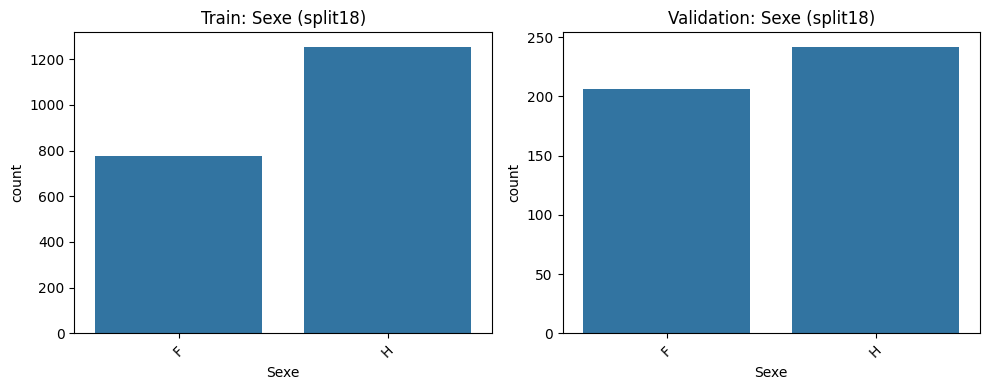


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.616749
3    0.202956
2    0.180296
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.575893
2    0.218750
3    0.205357
Name: proportion, dtype: float64


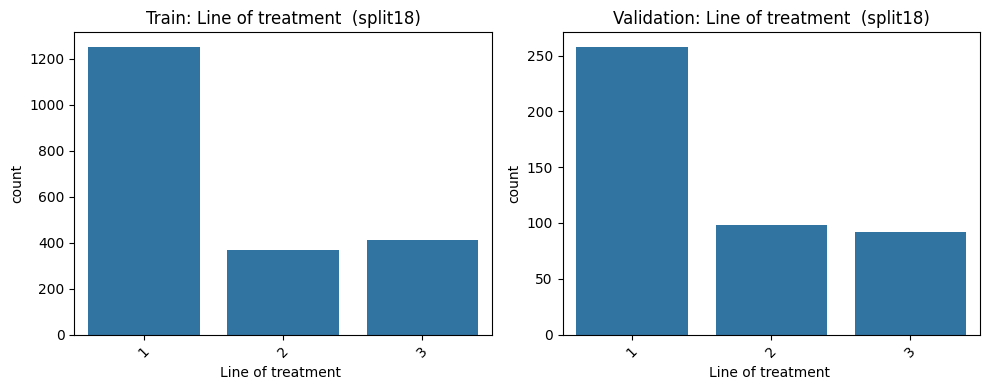


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.697537
10    0.302463
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.745536
10    0.254464
Name: proportion, dtype: float64


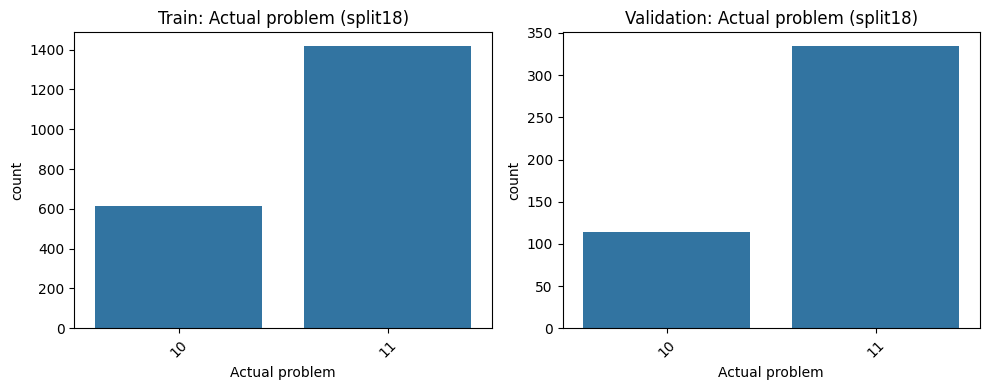



=== Covariate distributions for split19 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.607843
F    0.392157
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.588889
F    0.411111
Name: proportion, dtype: float64


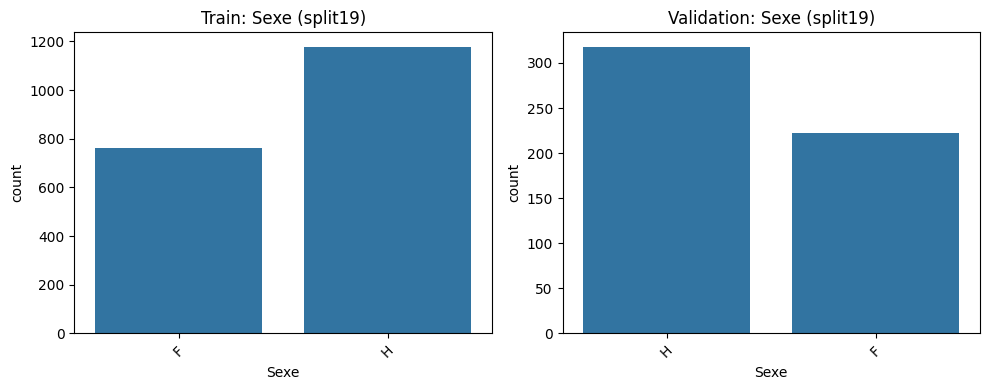


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.608875
3    0.201238
2    0.189886
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.611111
3    0.211111
2    0.177778
Name: proportion, dtype: float64


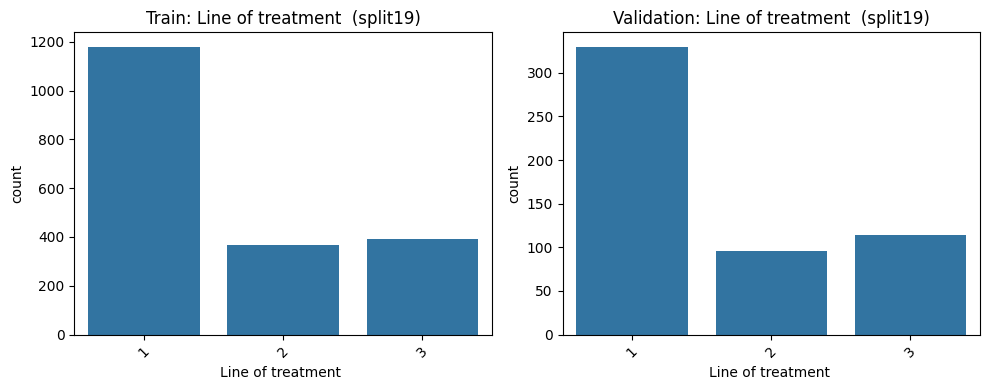


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.707946
10    0.292054
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.7
10    0.3
Name: proportion, dtype: float64


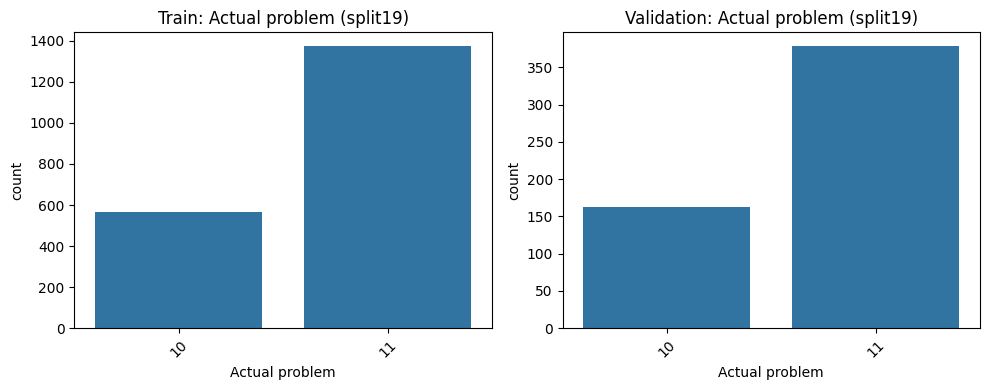

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data.csv file containing the scan information and bootstrap splits
df_csv = pd.read_csv("/home/mezher/Documents/Deauville_DeepLearning/splitting/data_resplit.csv")

# Load the mapping Excel file that contains additional covariates
mapping_excel_path = r"/home/mezher/Documents/Deauville_DeepLearning/splitting/1. DeepDeauville Excel complété et anonymisé.xlsx"
df_mapping = pd.read_excel(mapping_excel_path)

# Merge the two DataFrames on the study identifier. 
# In df_csv, the column is 'study_id'; in the Excel file, it might be 'SubjectCode'.
df_merged = pd.merge(df_csv, df_mapping, left_on="study_id", right_on="SubjectCode", how="left")

# Now, choose the covariate columns you want to investigate.
# (For example, "Sexe", "Line of treatment ", and "Actual problem")
covariate_columns = ["Sexe", "Line of treatment ", "Actual problem"]

# Define your bootstrap split columns (e.g. "split0", "split1", ..., "split19")
split_columns = [f"split{i}" for i in range(20)]

# Loop over each bootstrap split and compare the distributions between train and validation splits
for split_col in split_columns:
    print(f"=== Covariate distributions for {split_col} ===")
    
    # Filter the merged DataFrame for train and validation based on the current bootstrap split
    train_split = df_merged[df_merged[split_col] == 'train']
    val_split = df_merged[df_merged[split_col] == 'val']
    
    for cov in covariate_columns:
        print(f"\n--- Distribution for {cov} ---")
        print("Train distribution:")
        print(train_split[cov].value_counts(normalize=True))
        print("\nValidation distribution:")
        print(val_split[cov].value_counts(normalize=True))
        
        # Optional: visualize side-by-side
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.countplot(x=cov, data=train_split)
        plt.title(f"Train: {cov} ({split_col})")
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        sns.countplot(x=cov, data=val_split)
        plt.title(f"Validation: {cov} ({split_col})")
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    print("\n" + "="*50 + "\n")
